9/1/2020:  I've finalized luminosities/errors and corrected VLASS sources' flux densitities accordingly and am now returning to re-do a more robust version of our light curve analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import richardsplot
from astropy.cosmology import FlatLambdaCDM
import scipy.stats as spstats
import matplotlib.ticker as mtick
import datetime as dt
import matplotlib.dates as mdates
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

/Users/trevormccaffrey/anaconda3/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
def radluminosity(nu1, nu2, S_nu2, alpha, z):
    #calculate luminosity at nu1 based on data at nu2
    #input flux density units are µJy
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S_nu2*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

def isNAN(arr):
    #this isnan works for strings too; np.isnan(a) only works if all elements
    #is arr are floats
    return arr!=arr

In [4]:
radluminosity(6., 3., 874, -0.7, .226)

22.883874144119233

In [5]:
df = pd.read_csv("all_var_figs.csv")
df

Name      z  S1p4_FCat  S1p4_Fcat_e  S1p4_FIRST  S1p4_err  \
0   083353.88+422401.8  0.249     229.81     0.145109      229810       145   
1   084347.84+203752.4  0.227       3.11     0.151364        3110       151   
2   085632.99+595746.8  0.283      25.04     0.155956       25040       155   
3   092837.98+602521.0  0.295        NaN          NaN       11750      1941   
4   093200.07+553347.4  0.266       5.22     0.099172        5220        99   
..                 ...    ...        ...          ...         ...       ...   
65  161711.42+063833.4  0.229        NaN          NaN         630         0   
66  161723.67+085414.7  0.206        NaN          NaN         450         0   
67  161940.56+254323.0  0.269       1.66     0.141143        1660       141   
68  162750.54+473623.5  0.262       1.48     0.136389        1480       136   
69  172711.80+632242.1  0.217       1.36     0.140837        1360       140   

        S6_FIRST  S6_FIRST_err  S6_FIRST_alpha0  S6_FIRST_alpha0_err  ...  \
0   82889.378614    151.646727         229570.0                420.0  ...   
1    1036.252632     50.548909           2870.0                140.0  ...   
2    8950.767504     64.991454          24790.0                180.0  ...   
3    4152.231799    686.020906          11500.0               1900.0  ...   
4    1787.264992    104.708454           4950.0                290.0  ...   
..           ...           ...              ...                  ...  ...   
65    227.470090      0.000000            630.0                  0.0  ...   
66    162.478636      0.000000            450.0                  0.0  ...   
67    516.320998     39.717000           1430.0                110.0  ...   
68    454.940180     39.717000           1260.0                110.0  ...   
69    393.559362     46.938273           1090.0                130.0  ...   

    S6_Aconfig  S6_Aconfig_err  L6_Aconfig  L6_Aconfig_alpha0  \
0          NaN             NaN    0.000000           0.000000   
1          NaN             NaN    0.000000           0.000000   
2          NaN             NaN    0.000000           0.000000   
3          NaN             NaN    0.000000           0.000000   
4          NaN             NaN    0.000000           0.000000   
..         ...             ...         ...                ...   
65       466.2        7.100000   22.834258          22.771572   
66       386.7       18.164801   22.652190          22.595246   
67       407.0       21.633308   22.929946          22.857523   
68       441.0       12.000000   22.939355          22.868614   
69       670.0       82.000000   22.940386          22.880683   

   L6_Aconfig_uplim  L6_Aconfig_lolim  DATE_VLAA  CLASS  Alpha  VAR  
0          0.000000          0.000000    \nodata     RL    0.0  0.0  
1          0.000000          0.000000    \nodata     RL    0.0  1.0  
2          0.000000          0.000000    \nodata     RL    0.0  0.0  
3          0.000000          0.000000    \nodata     RL    0.0  0.0  
4          0.000000          0.000000    \nodata     RL    0.0  0.0  
..              ...               ...        ...    ...    ...  ...  
65         0.006564         -0.006665    2019-08     RQ   -0.7  0.0  
66         0.019936         -0.020895    2019-08     RQ    0.0  0.0  
67         0.022492         -0.023720    2019-08     RQ   -0.7  0.0  
68         0.011660         -0.011981    2019-09     RQ   -0.7  0.0  
69         0.050143         -0.056697    2019-09     RQ    0.0  0.0  

[70 rows x 45 columns]

In [6]:
sdss_names = df[["Name"]].values.flatten()
z = df[["z"]].values.flatten()
RQ = df[["CLASS"]].values.flatten()=="RQ"
RI = df[["CLASS"]].values.flatten()=="RI"
RL = df[["CLASS"]].values.flatten()=="RL"

In [7]:
sdss_names[RI]
#J1017+1516, J1511+1009, J1513+2623

array(['075403.60+481428.0', '083658.90+442602.2', '091702.11+212337.5',
       '094215.12+090015.8', '094603.94+013923.6', '101719.02+151620.8',
       '105607.79+134443.6', '110704.52+320630.0', '113109.24+263207.8',
       '114954.98+044812.8', '115523.74+150756.9', '125807.45+232921.6',
       '133636.65+420934.1', '134113.93-005315.0', '134206.56+050523.8',
       '140407.17+213321.6', '141116.72+194440.0', '144012.74+615633.0',
       '144930.49-004746.3', '145005.13+463521.3', '151132.53+100953.1',
       '151351.50+262358.1', '151936.14+283827.6', '154307.77+193751.7',
       '161217.97+073145.4', '162607.24+335915.3', '171013.42+334402.5'],
      dtype=object)

In [8]:
L6_Aconfig = df[["L6_Aconfig"]].values.flatten()
L6_Aconfigup = df[["L6_Aconfig_alpha0"]].values.flatten()
L6_Aconfig_uplim = df[["L6_Aconfig_uplim"]].values.flatten()
L6_Aconfig_lolim = df[["L6_Aconfig_lolim"]].values.flatten()
Lnu_Aconfig_err = np.array([L6_Aconfig_lolim, L6_Aconfig_uplim])
L6_Aconfig_err = Lnu_Aconfig_err.T

In [9]:
L6_first = df[["L6_FIRST"]].values.flatten()
L6_firstup = df[["L6_FIRST_alpha0"]].values.flatten()
L6_first_uplim = df[["L6_FIRST_uplim"]].values.flatten()
L6_first_lolim = df[["L6_FIRST_lolim"]].values.flatten()
Lnu_first_err = np.array([L6_first_lolim, L6_first_uplim])
L6_first_err = Lnu_first_err.T 
dates_first = df[["DATE_FIRST"]].values.flatten()

L6_kell = df[["L6_Kell"]].values.flatten()
L6_kellup = df[["L6_Kell_alpha0"]].values.flatten()
L6_kell_uplim = df[["L6_Kell_uplim"]].values.flatten()
L6_kell_lolim = df[["L6_Kell_lolim"]].values.flatten()
Lnu_kell_err = np.array([L6_kell_lolim, L6_kell_uplim])
L6_kell_err = Lnu_kell_err.T 
dates_kell = df[["DATE_VLAC"]].values.flatten()

L6_vlass = df[["L6_VLASS"]].values.flatten()
L6_vlassup = df[["L6_VLASS_alpha0"]].values.flatten()
L6_vlass_uplim = df[["L6_VLASS_uplim"]].values.flatten()
L6_vlass_lolim = df[["L6_VLASS_lolim"]].values.flatten()
Lnu_vlass_err = np.array([L6_vlass_lolim, L6_vlass_uplim])
L6_vlass_err = Lnu_vlass_err.T
dates_vlass = df[["DATE_VLASS"]].values.flatten()

L6_Aconfig = df[["L6_Aconfig"]].values.flatten()
L6_Aconfigup = df[["L6_Aconfig_alpha0"]].values.flatten()
L6_Aconfig_uplim = df[["L6_Aconfig_uplim"]].values.flatten()
L6_Aconfig_lolim = abs(df[["L6_Aconfig_lolim"]].values.flatten())
Lnu_Aconfig_err = np.array([L6_Aconfig_lolim, L6_Aconfig_uplim])
L6_Aconfig_err = Lnu_Aconfig_err.T
dates_Aconfig = df[["DATE_VLAA"]].values.flatten()

In [10]:
dates_first, dates_Aconfig, dates_kell, dates_vlass

(array(['1995-12-19', '1998-10-15', '2002-07-15', '2002-07-15',
        '1997-05-15', '1998-09-15', '1999-12-15', '1997-04-10',
        '1996-01-15', '1998-07-15', '1995-12-05', '1999-11-15',
        '1995-11-10', '1998-10-15', '1997-04-10', '1997-02-28',
        '1998-09-15', '2000-01-15', '1998-07-24', '1999-11-15',
        '1999-12-15', '1994-06-11', '1995-11-13', '2000-02-15',
        '1999-11-15', '1995-12-23', '1995-10-23', '1998-08-15',
        '2000-02-15', '1998-10-15', '1999-11-15', '2003-12-28',
        '1998-08-15', '1997-03-25', '2000-01-15', '1995-11-13',
        '1993-04-29', '1999-01-15', '2000-02-15', '1994-06-25',
        '1994-06-19', '1997-03-22', '1997-05-07', '2000-01-15',
        '1997-04-10', '2000-01-15', '1999-11-15', '1993-04-13',
        '1998-09-15', '1993-05-04', '1997-05-04', '1997-04-29',
        '2002-7-15', '1998-09-16', '1994-07-05', '2000-02-07',
        '1994-09-02', '2000-01-15', '1998-07-18', '1994-08-19',
        '1994-07-10', '2000-01-15', '1994

In [11]:
#Array of luminosities
data = np.array([L6_first, L6_kell, L6_vlass, L6_Aconfig]).T
dataup = np.array([L6_firstup, L6_kellup, L6_vlassup, L6_Aconfigup]).T

#Arrays of errors
errs_rq = np.array([L6_first_err[RQ], L6_kell_err[RQ], L6_Aconfig_err[RQ], L6_vlass_err[RQ]])
errs_ri = np.array([L6_first_err[RI], L6_kell_err[RI], L6_vlass_err[RI]])
errs_rl = np.array([L6_first_err[RL], L6_kell_err[RL], L6_vlass_err[RL]])

#Array of dates
dates = np.array([dates_first, dates_kell, dates_vlass, dates_Aconfig]).T
for i in range(dates.shape[0]): #format dates for plotting
    for j in range(dates.shape[1]):
        try:
            dates[i,j] = dt.datetime.strptime(dates[i,j],'%Y-%m-%d').date()
        except:
            if not dates[i,j]=="\\nodata":
                dates[i,j] = dt.datetime.strptime(dates[i,j],'%Y-%m').date()
            else:
                dates[i,j] = "9999-01-01"
                dates[i,j] = dt.datetime.strptime(dates[i,j],'%Y-%m-%d').date()

In [12]:
dates

array([[datetime.date(1995, 12, 19), datetime.date(2010, 11, 1),
        datetime.date(2019, 5, 24), datetime.date(9999, 1, 1)],
       [datetime.date(1998, 10, 15), datetime.date(2010, 11, 1),
        datetime.date(2019, 4, 13), datetime.date(9999, 1, 1)],
       [datetime.date(2002, 7, 15), datetime.date(2010, 11, 1),
        datetime.date(2017, 9, 25), datetime.date(9999, 1, 1)],
       [datetime.date(2002, 7, 15), datetime.date(2010, 11, 1),
        datetime.date(2017, 9, 18), datetime.date(9999, 1, 1)],
       [datetime.date(1997, 5, 15), datetime.date(2010, 11, 1),
        datetime.date(2017, 9, 23), datetime.date(9999, 1, 1)],
       [datetime.date(1998, 9, 15), datetime.date(2010, 1, 1),
        datetime.date(2019, 4, 19), datetime.date(9999, 1, 1)],
       [datetime.date(1999, 12, 15), datetime.date(2010, 12, 1),
        datetime.date(2017, 10, 6), datetime.date(9999, 1, 1)],
       [datetime.date(1997, 4, 10), datetime.date(2010, 12, 1),
        datetime.date(2019, 5, 10), da

In [13]:
novlass = np.array([True, True, False, True])

In [14]:
data

array([[25.16443769, 25.56608509, 25.33581329,  0.        ],
       [23.17276745, 23.88654761, 23.48243168,  0.        ],
       [24.32126977, 24.92103025, 24.97158849,  0.        ],
       [24.02795873, 24.36116037, 24.15286073,  0.        ],
       [23.561717  , 24.02158819, 23.83067774,  0.        ],
       [24.32098483, 24.96694367, 24.68339835,  0.        ],
       [23.88711889, 24.3680092 , 24.39841771,  0.        ],
       [24.08298945, 24.27274008, 24.33075264,  0.        ],
       [24.47541175, 24.62720927, 24.38019951,  0.        ],
       [25.2784643 , 25.71845958, 25.59536129,  0.        ],
       [23.6859153 , 24.29411427, 23.92412942,  0.        ],
       [24.00685209, 24.38864439, 24.37885766,  0.        ],
       [24.05872079, 24.13760054, 24.07892731,  0.        ],
       [24.41002106, 25.01697604, 24.68350139,  0.        ],
       [23.80093306, 23.76529368, 23.77747   ,  0.        ],
       [23.78405931, 23.67935915, 23.68325345,  0.        ],
       [23.22599631, 23.

In [15]:
#Call these out in plots below
special = ['085640.78+105755.8', '100033.88+104723.7', '101719.02+151620.8', '151132.53+100953.1', '151351.50+262358.1']

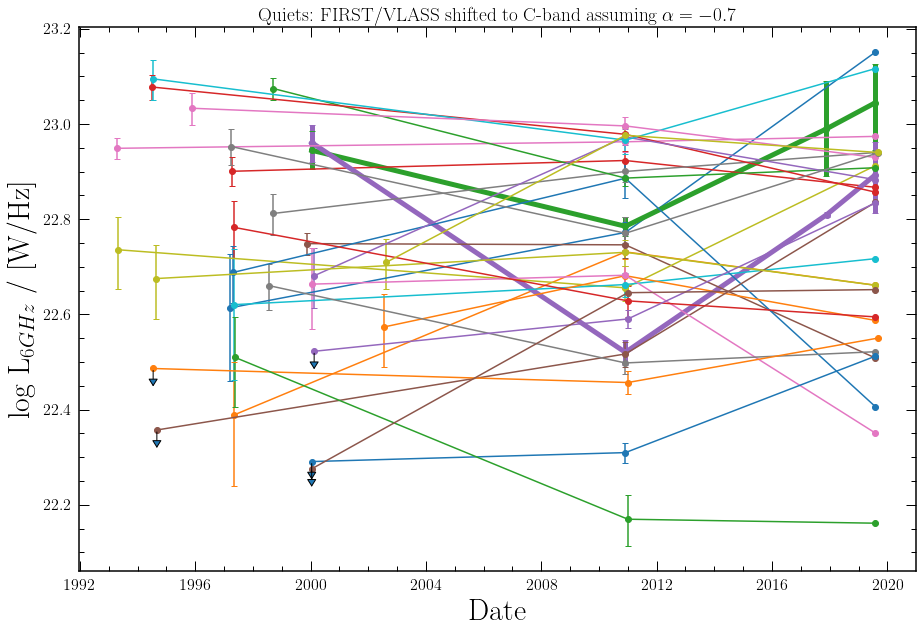

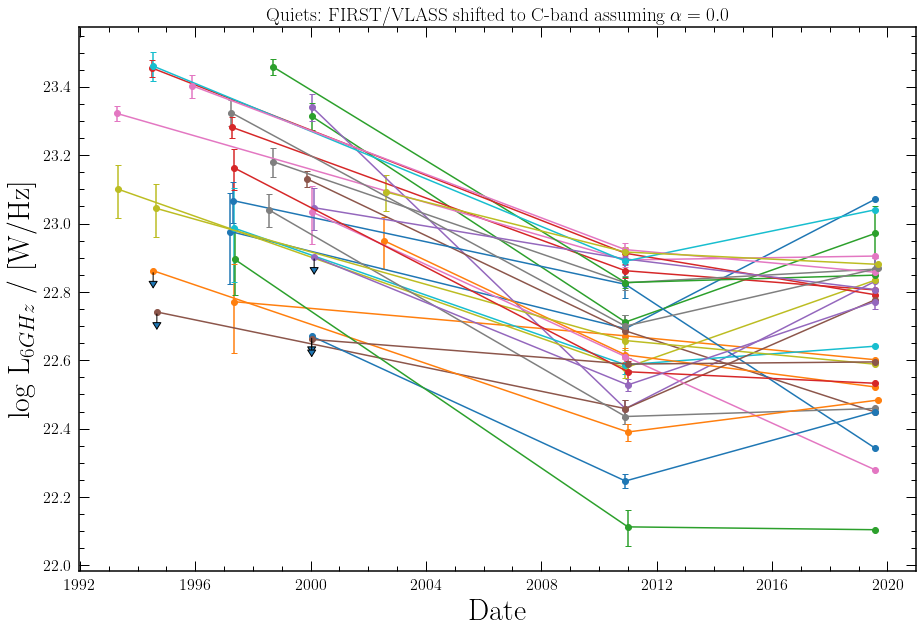

In [16]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RQ].shape[0]):
    
    if sdss_names[RQ][i] in special:
        plt.errorbar(x=dates[RQ][i], y=data[RQ][i], yerr=errs_rq[:,i].T, 
                     fmt="-o", capsize=2.8, linewidth=5.0)
    else:
        plt.errorbar(x=dates[RQ][i][novlass], y=data[RQ][i][novlass], yerr=errs_rq[:,i][novlass].T, 
                     fmt="-o", capsize=2.8)

    if (errs_rq[0][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RQ].shape[0]):
    plt.errorbar(x=dates[RQ][i][novlass], y=dataup[RQ][i][novlass], yerr=errs_rq[:,i][novlass].T, 
                 fmt="-o", capsize=2.8)
    
    if (errs_rq[0][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

In [17]:
errs_rq[:,0]

array([[0.15330662, 0.11308189],
       [0.02248237, 0.02137557],
       [0.02787839, 0.02619625],
       [0.        , 0.        ]])

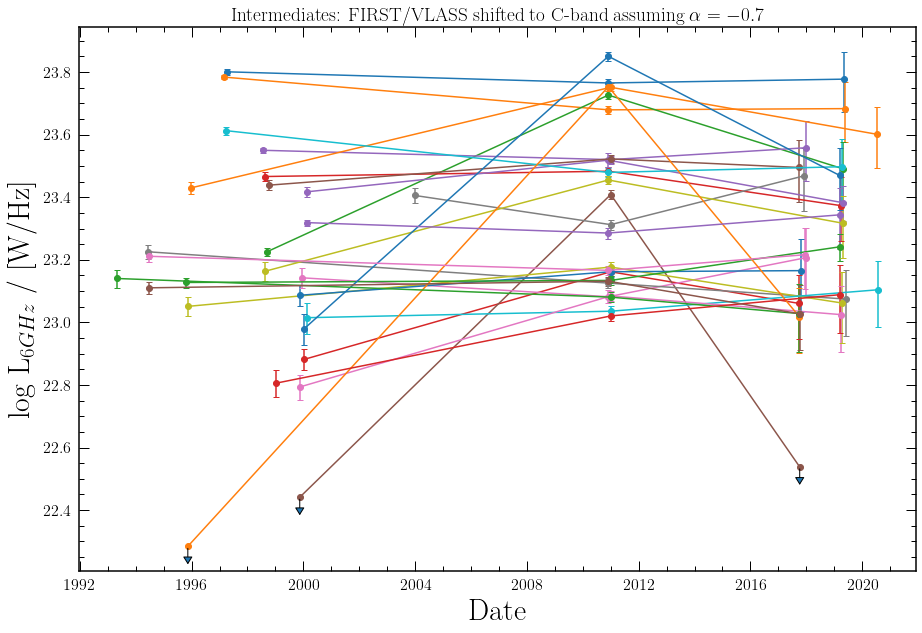

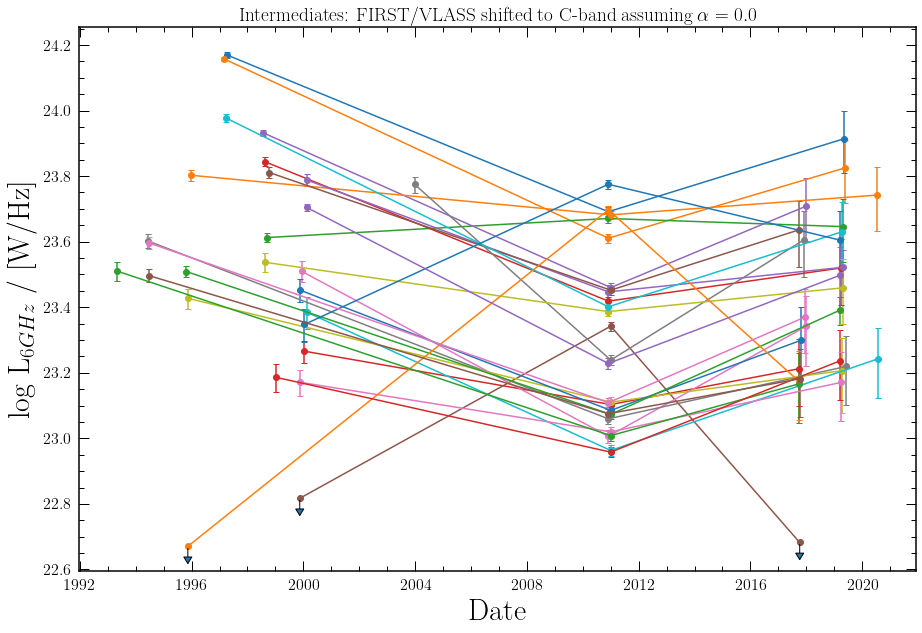

In [18]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RI].shape[0]):
    plt.errorbar(x=dates[RI][i,:3], y=data[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RI].shape[0]):
    plt.errorbar(x=dates[RI][i,:3], y=dataup[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        plt.annotate('', xy=(dates[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

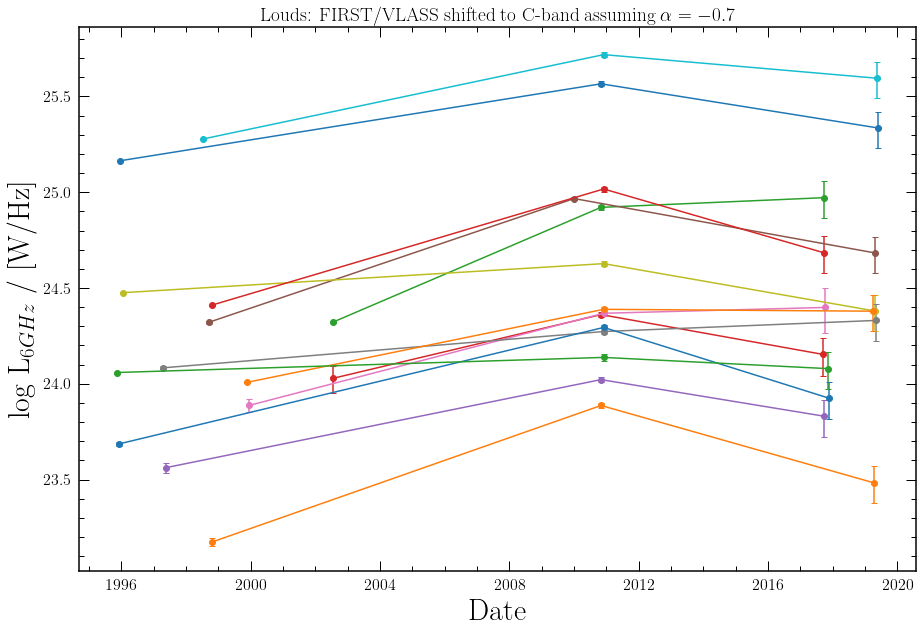

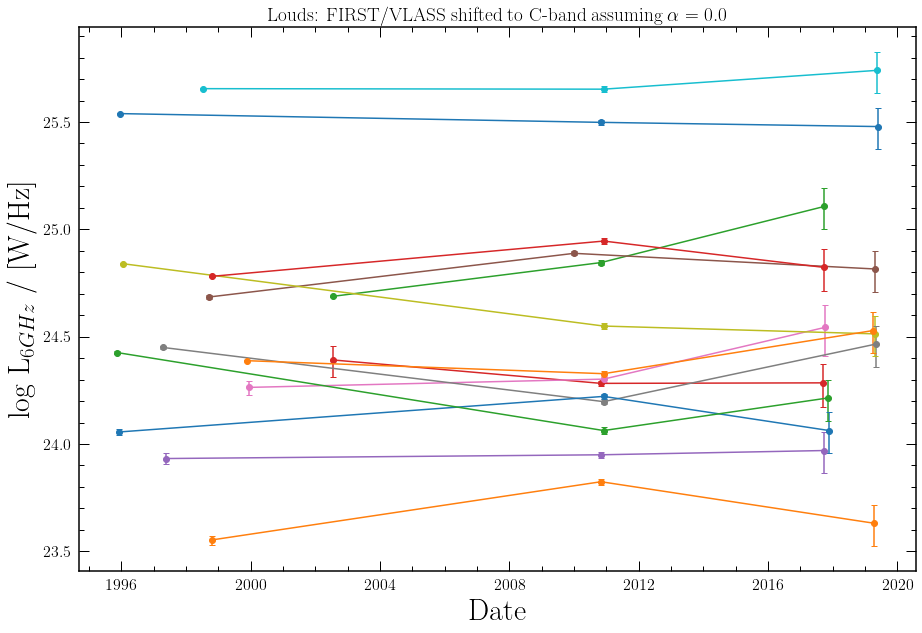

In [19]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RL].shape[0]):
    plt.errorbar(x=dates[RL][i,:3], y=data[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][0], data[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][2], data[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RL].shape[0]):
    plt.errorbar(x=dates[RL][i,:3], y=dataup[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][0], dataup[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        plt.annotate('', xy=(dates[RL][i][2], dataup[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---
## Now do the $\chi^2$ fits

#### RQ first

In [20]:
#Can save the recorded spectral indinces here
alpha = np.zeros(len(data))

#Need to convert the dates to "raw" years to do the fits to the light curves
dates_fit = np.array([]).reshape(0,4)
for i in range(len(dates)):
    dates_fit_i = np.zeros(len(dates[i]))
    for j in range(len(dates[i])):
        dates_fit_i[j] = dates[i][j].year+(dates[i][j].month-1)/12+dates[i][j].day/365.25
    dates_fit = np.vstack((dates_fit, dates_fit_i))

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


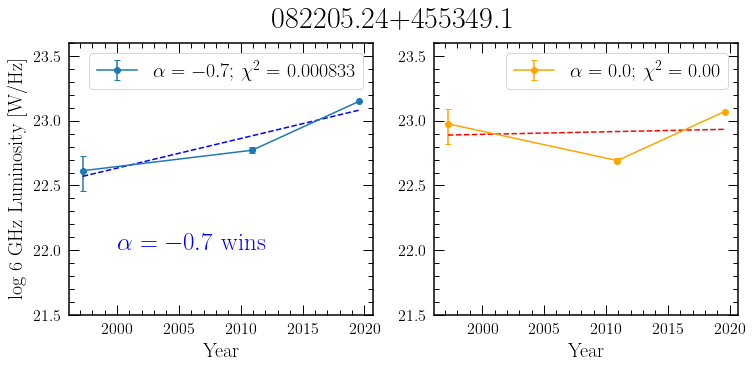

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


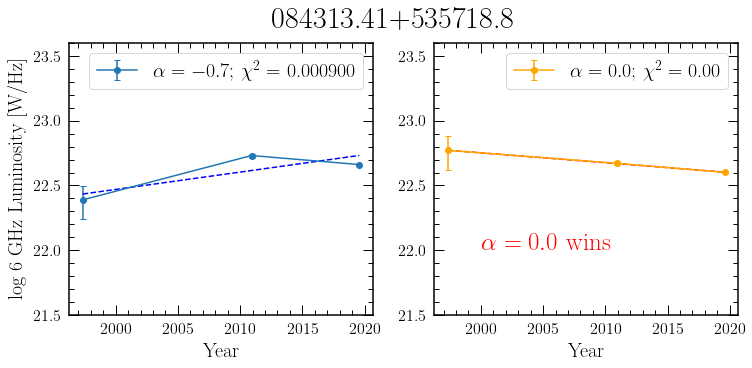

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


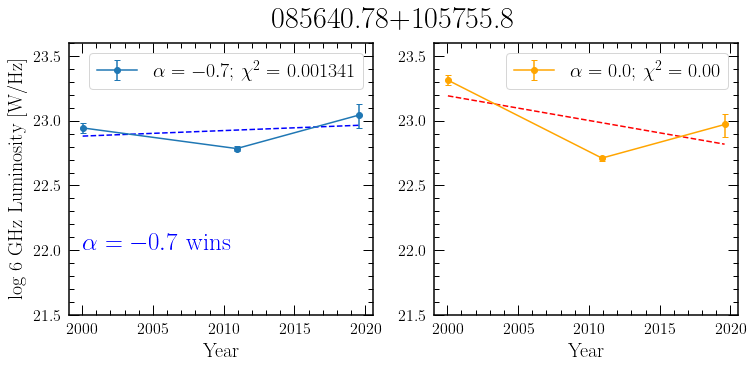

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


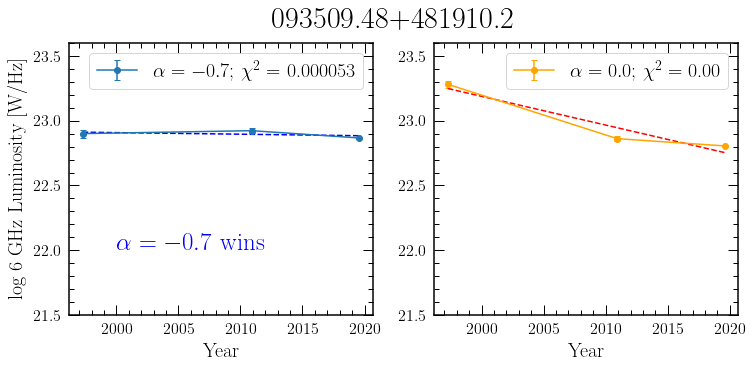

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


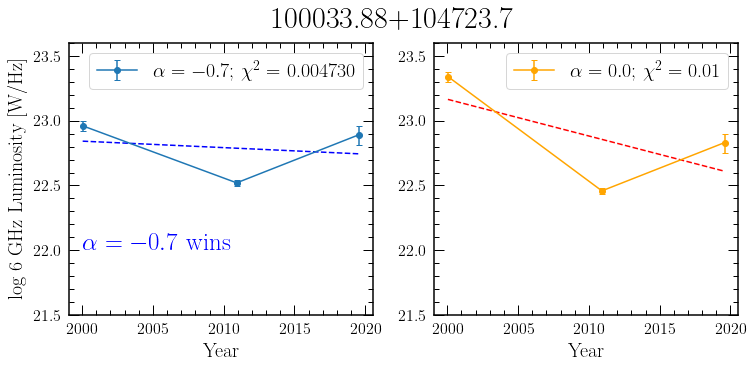

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


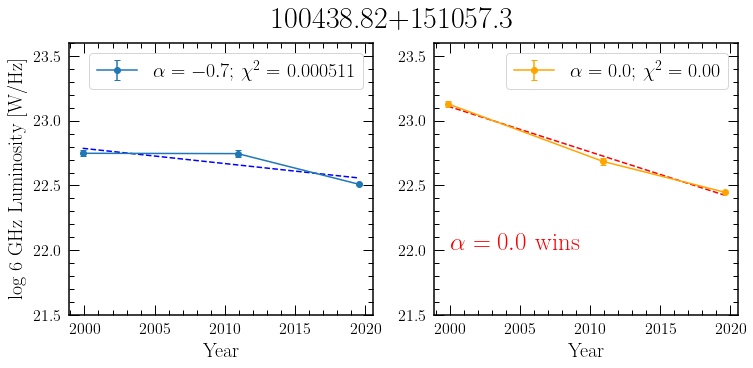

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


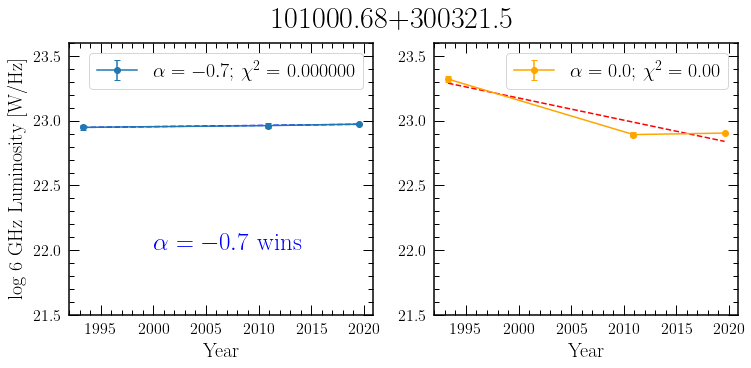

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


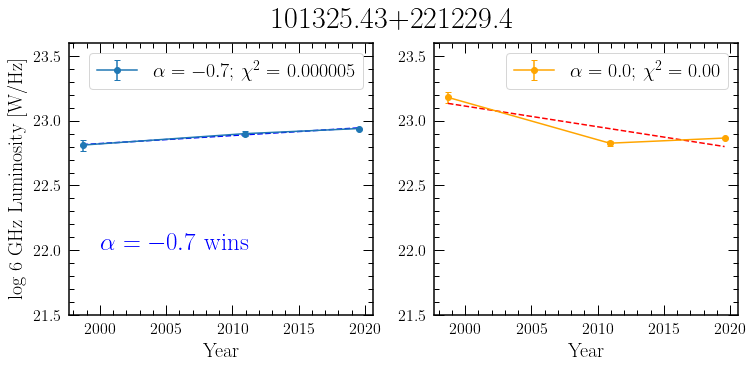

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


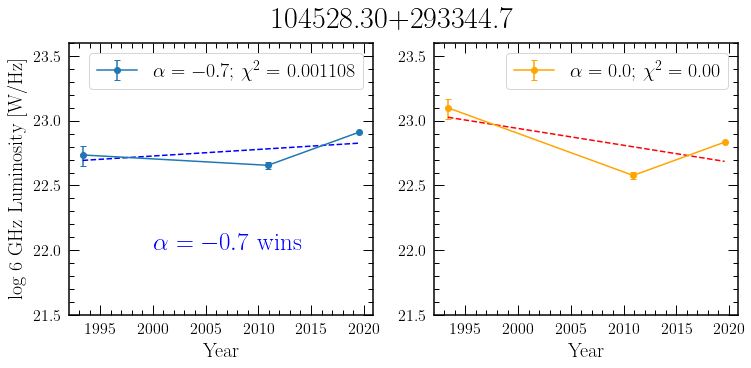

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


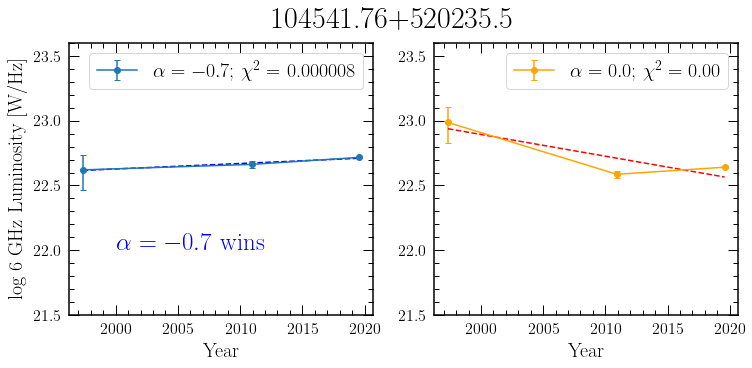

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


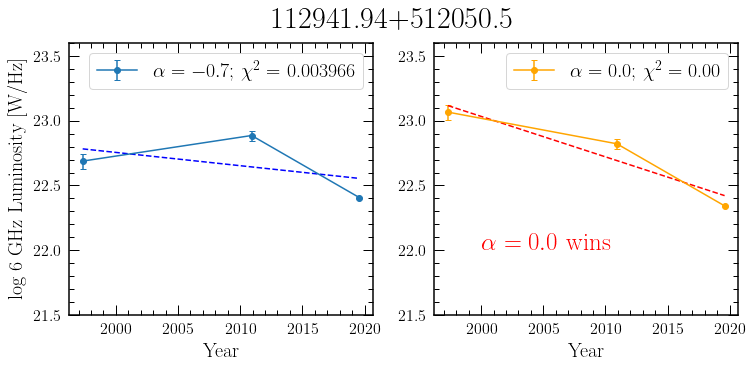

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


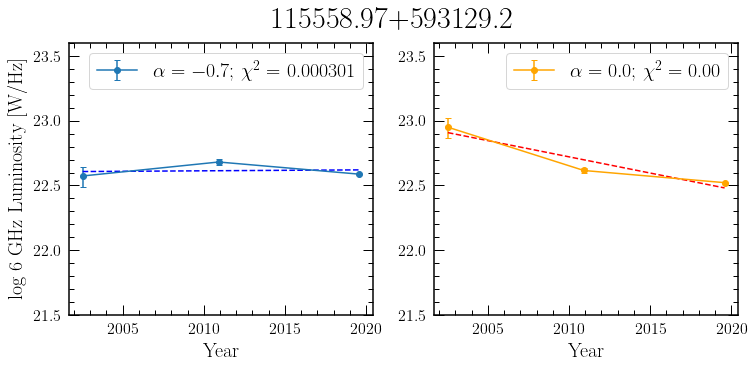

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


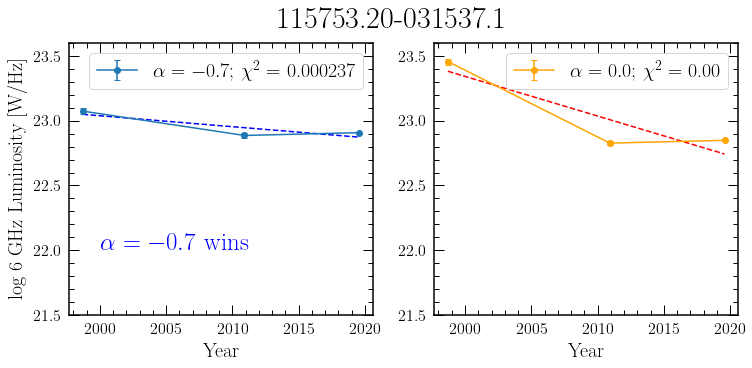

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


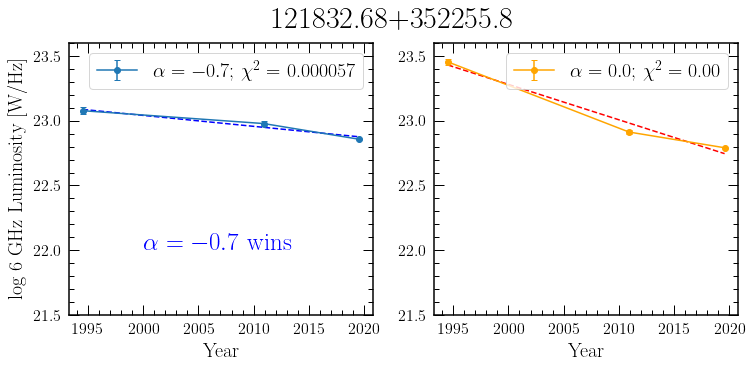

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


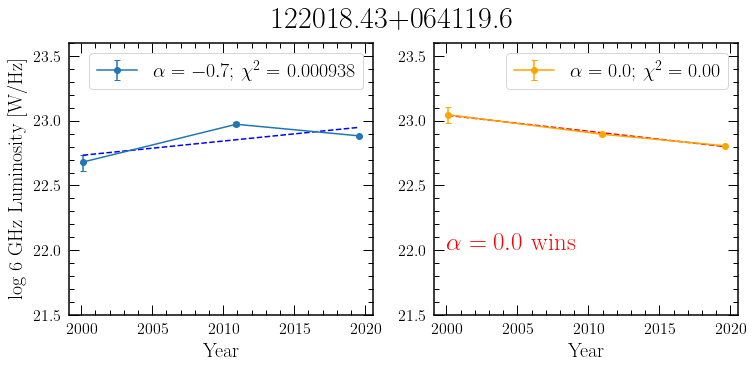

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


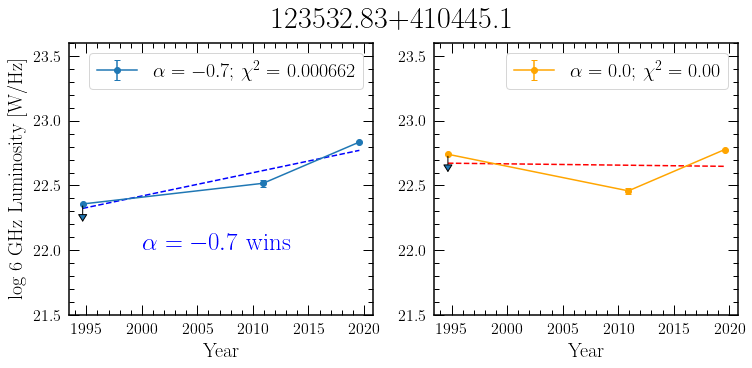

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


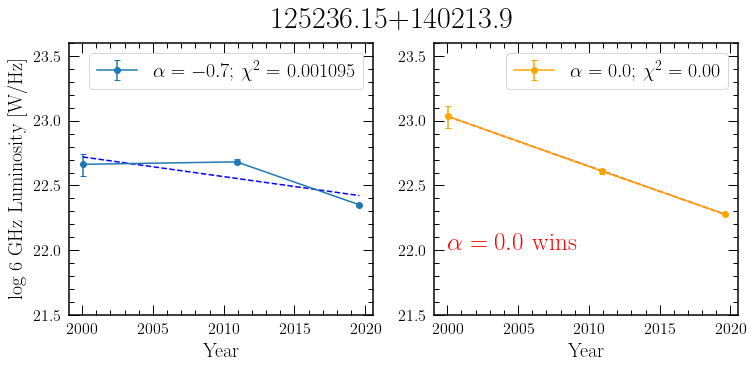

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


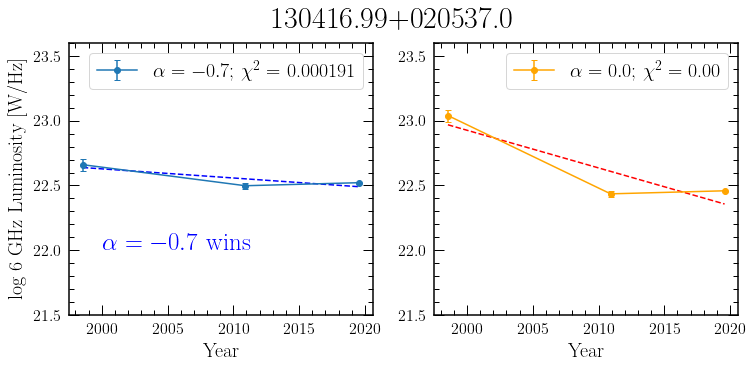

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


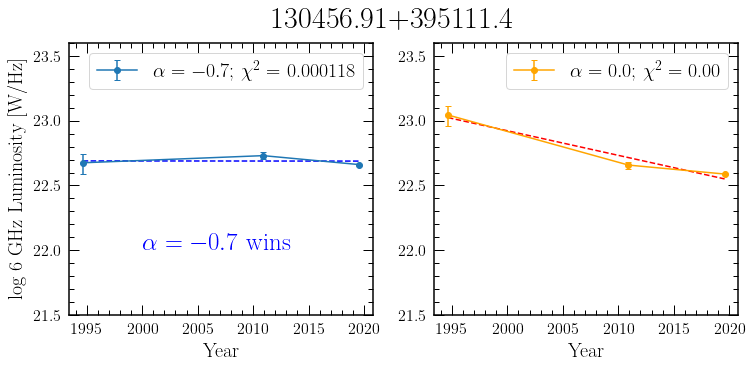

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


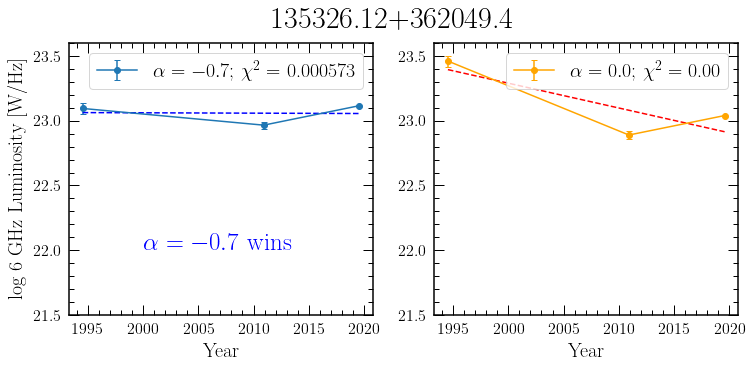

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


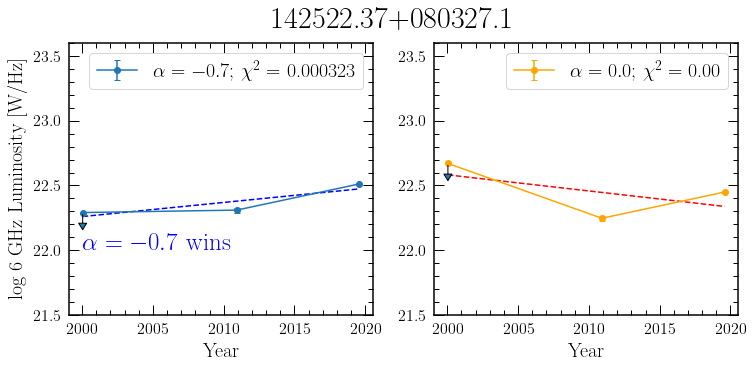

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


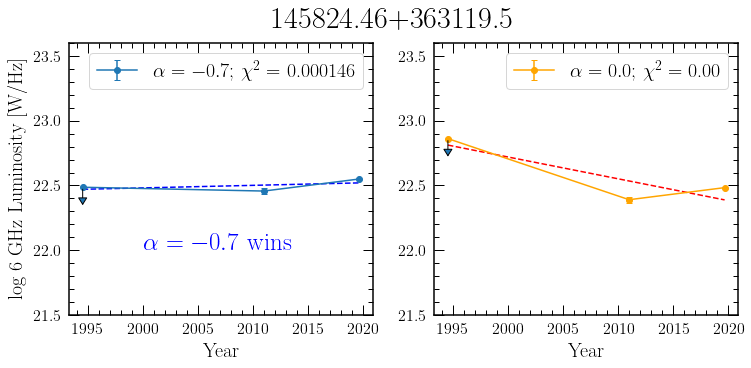

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


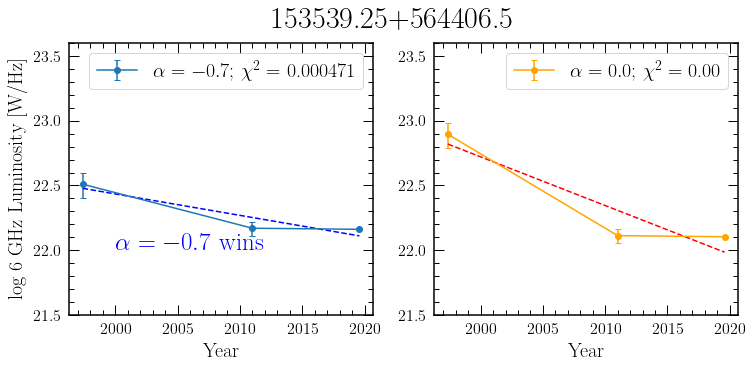

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


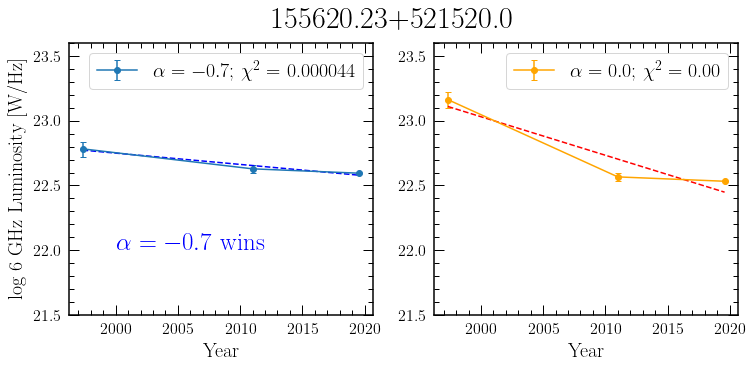

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


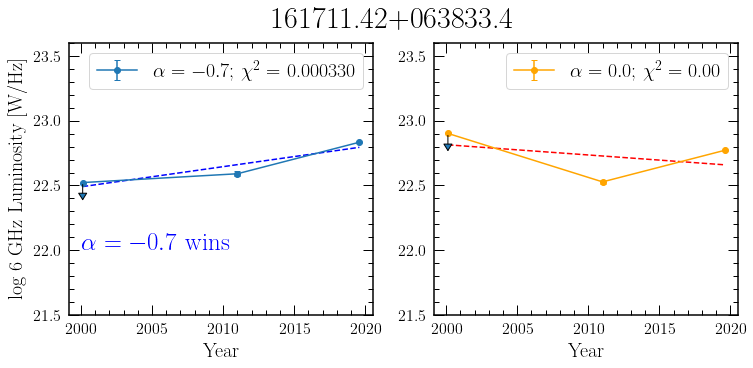

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


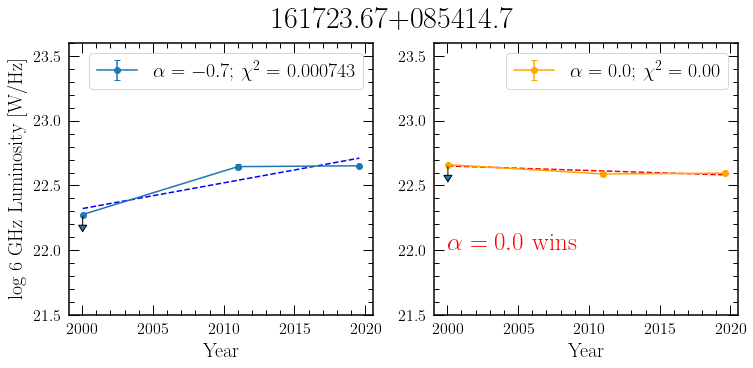

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


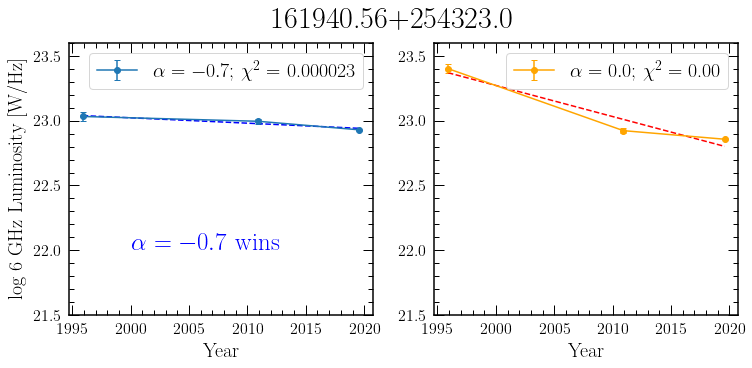

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


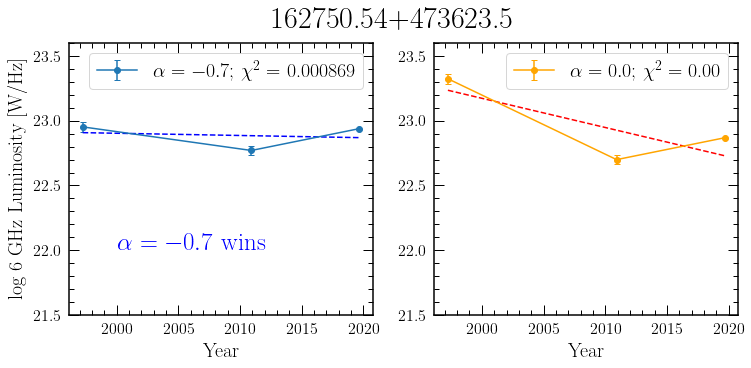

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


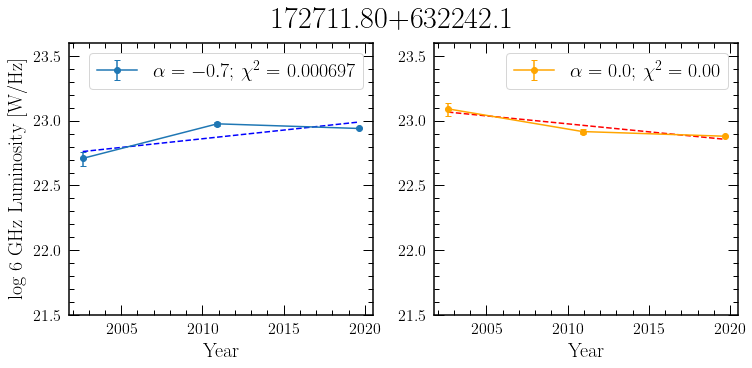

Radio-quiet spectral index counts:

alpha=0.0 : 7
alpha=-0.7: 22


In [21]:
#Can save the recorded spectral indinces here
alpha_rq = np.zeros(len(data[RQ]))

num0 = 0
num7 = 0

for i in range(len(data[RQ])):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[RQ][i][novlass], dataup[RQ][i][novlass],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[RQ][i][novlass], data[RQ][i][novlass],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[RQ][i][novlass] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[RQ][i][novlass] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(dataup[RQ][i][novlass], y0)
    chisq_alphaminp7 = spstats.chisquare(data[RQ][i][novlass], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,22), color="blue", size=25)
        alpha_rq[i] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,22), color="red", size=25)
        alpha_rq[i] = 0.0
        
    #plot true luminosities and their fits for each alpha side by side
    axs[0].errorbar(x=dates_fit[RQ][i][novlass], y=data[RQ][i][novlass], yerr=errs_rq[:,i][novlass].T, 
                 fmt="-o", capsize=2.8, label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[RQ][i][novlass], y7, '--b')
    
    if (errs_rq[0][i]==0.).all():
        axs[0].annotate('', xy=(dates_fit[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        axs[1].annotate('', xy=(dates_fit[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(21.5, 23.6)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].errorbar(x=dates_fit[RQ][i][novlass], y=dataup[RQ][i][novlass], yerr=errs_rq[:,i][novlass].T, 
                 color="orange", fmt="-o", capsize=2.8, label="$\\alpha = 0.0$; $\chi^2 =$ %.2f" % chisq_alpha0[0])
    axs[1].plot(dates_fit[RQ][i][novlass], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(21.5, 23.6)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(sdss_names[RQ][i], fontsize=30)
    plt.show()
    
print("Radio-quiet spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)
alpha[RQ] = alpha_rq

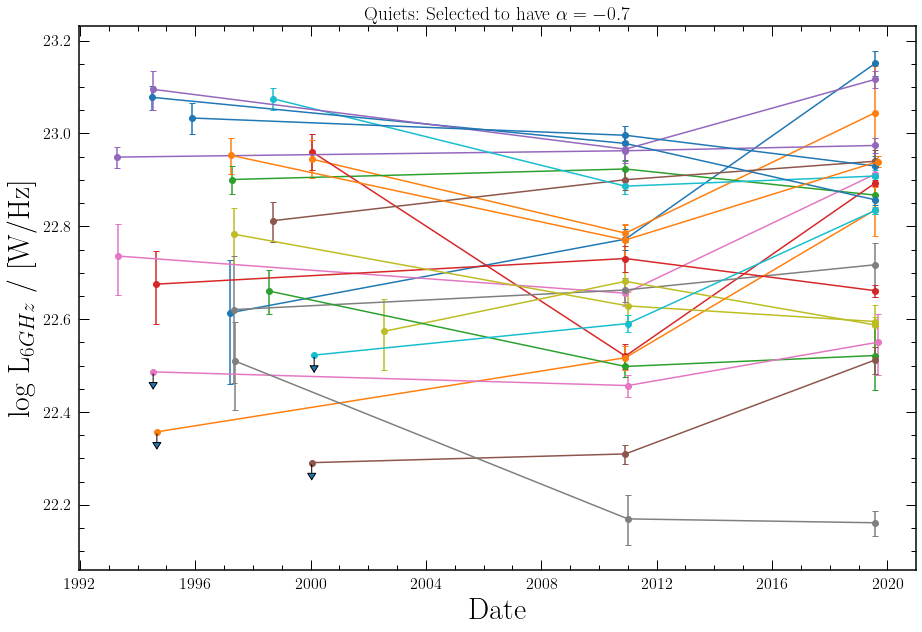

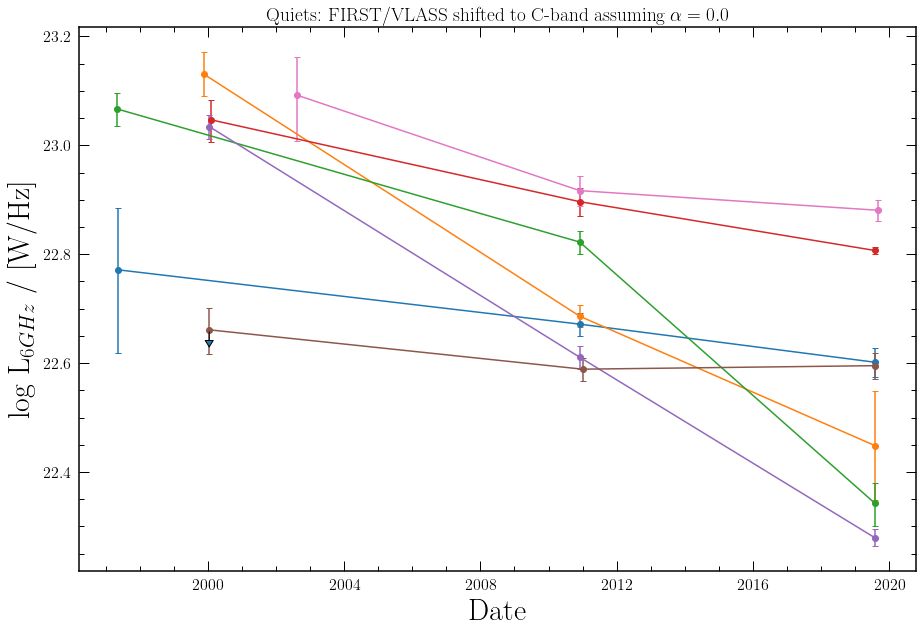

In [22]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RQ][alpha[RQ]==-0.7].shape[0]):
    plt.errorbar(x=dates[RQ][alpha[RQ]==-0.7][i][novlass], y=data[RQ][alpha[RQ]==-0.7][i][novlass], 
                 yerr=np.array([errs_rq[0][alpha_rq==-0.7][i], errs_rq[1][alpha_rq==-0.7][i], errs_rq[2][alpha_rq==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][alpha_rq==-0.7][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][alpha[RQ]==-0.7][i][0], data[RQ][alpha[RQ]==-0.7][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: Selected to have $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RQ][alpha[RQ]==0.0].shape[0]):
    plt.errorbar(x=dates[RQ][alpha[RQ]==0.0][i][novlass], y=dataup[RQ][alpha[RQ]==0.0][i][novlass], 
                 yerr=np.array([errs_rq[0][alpha_rq==-0.7][i], errs_rq[1][alpha_rq==-0.7][i], errs_rq[2][alpha_rq==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][alpha_rq==0.0][i]==0.).all():
        plt.annotate('', xy=(dates[RQ][alpha[RQ]==0.0][i][0], dataup[RQ][alpha[RQ]==0.0][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---
### Intermediates

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


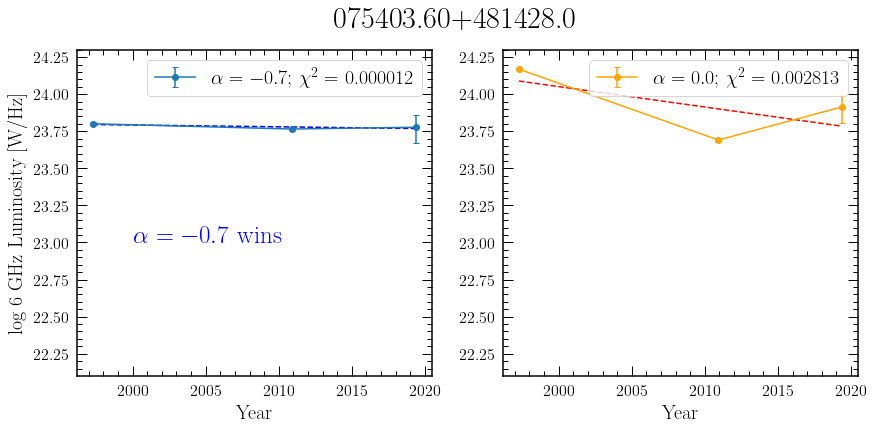

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


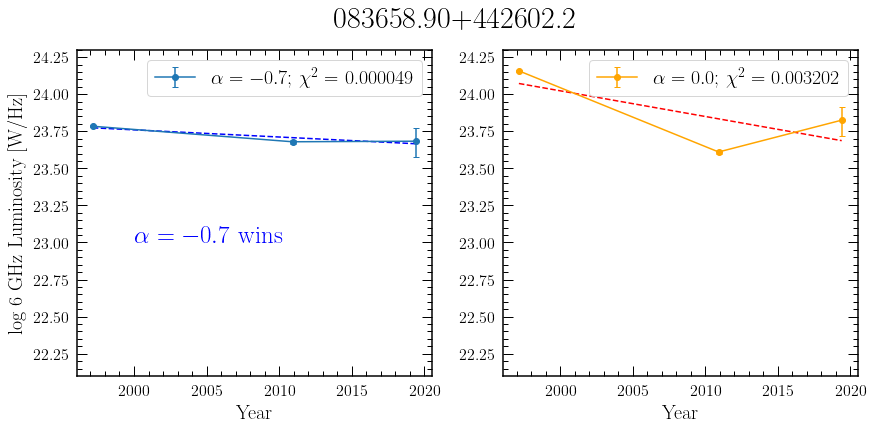

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


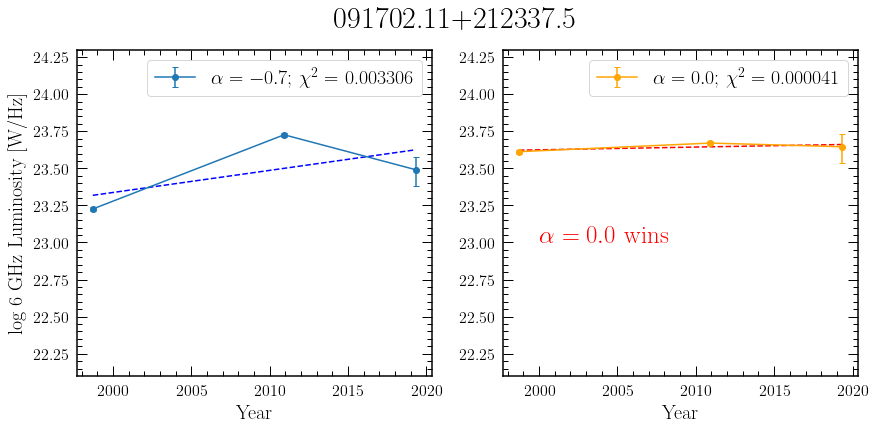

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


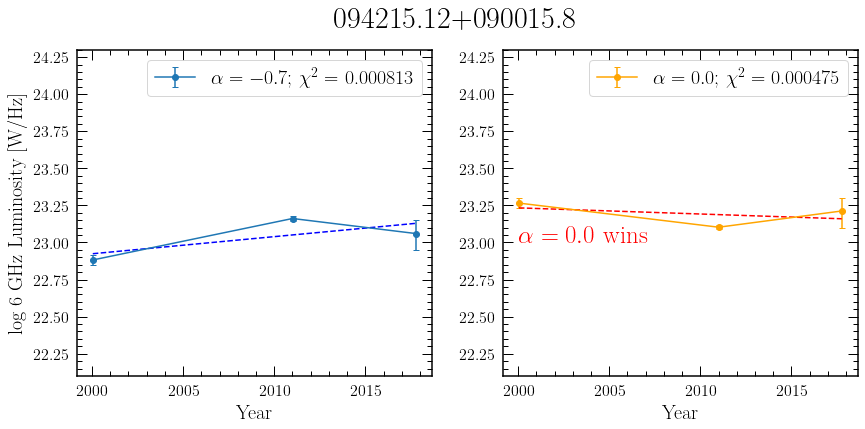

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


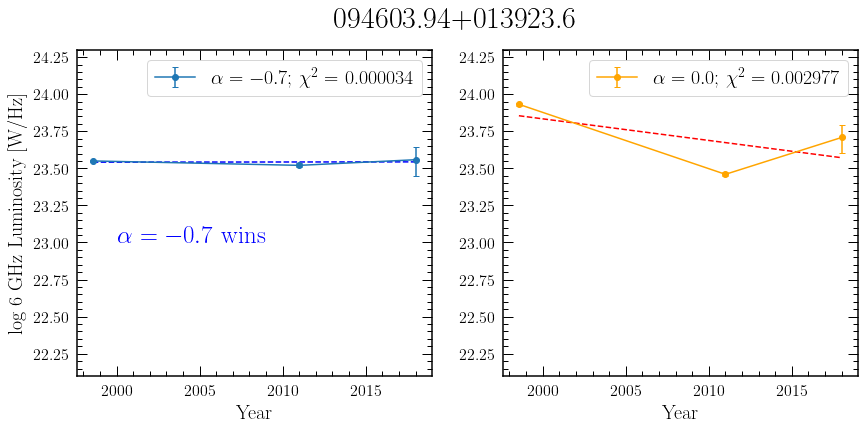

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


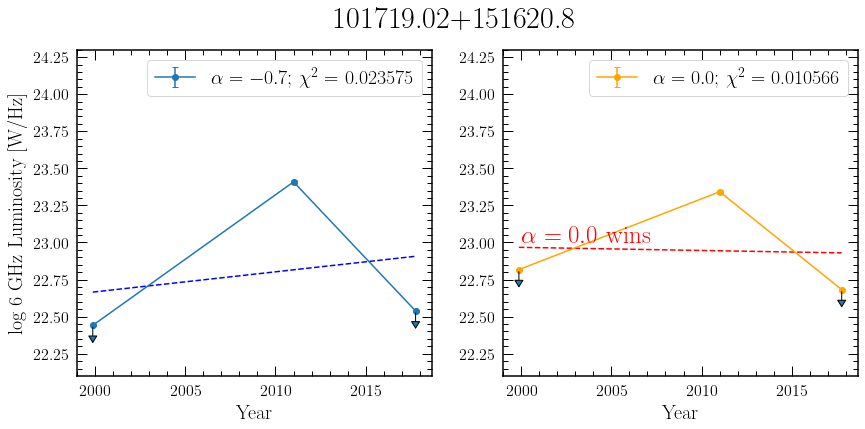

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


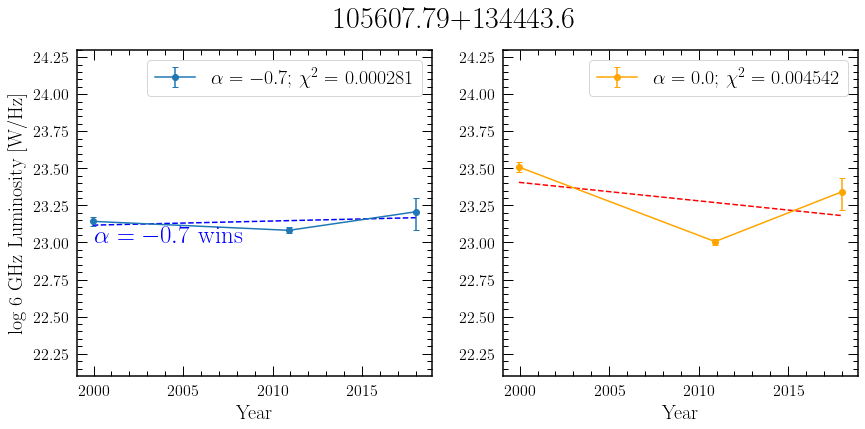

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


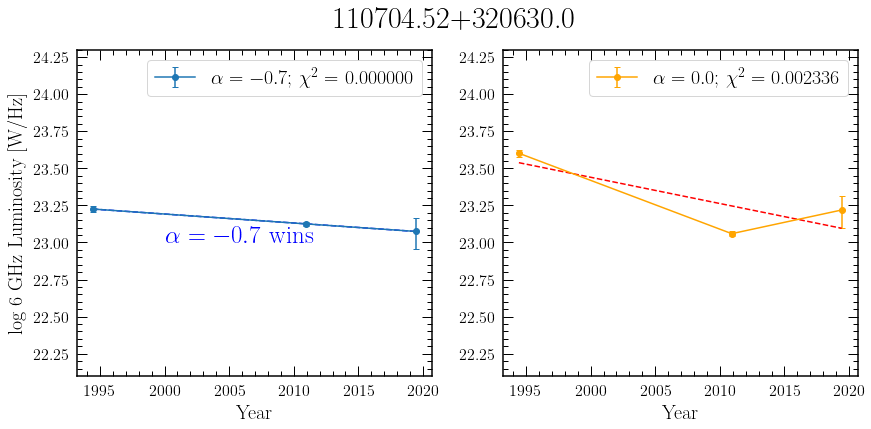

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


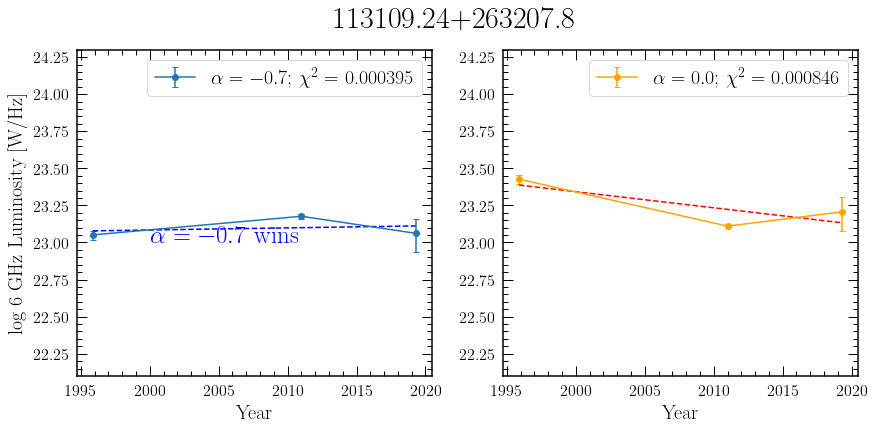

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


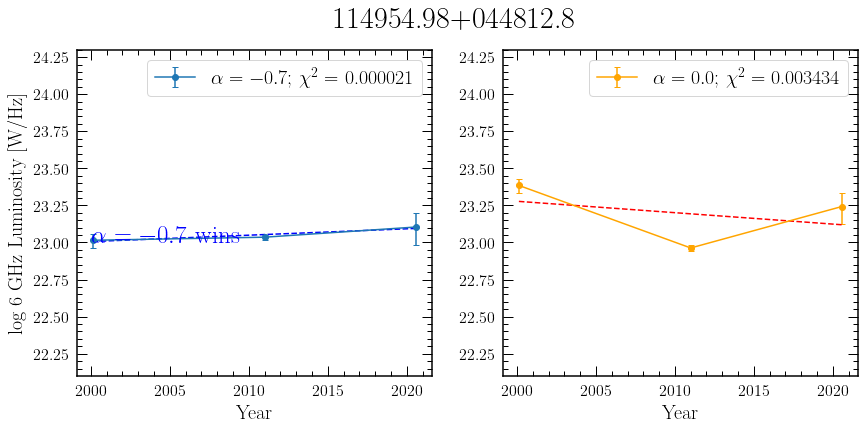

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


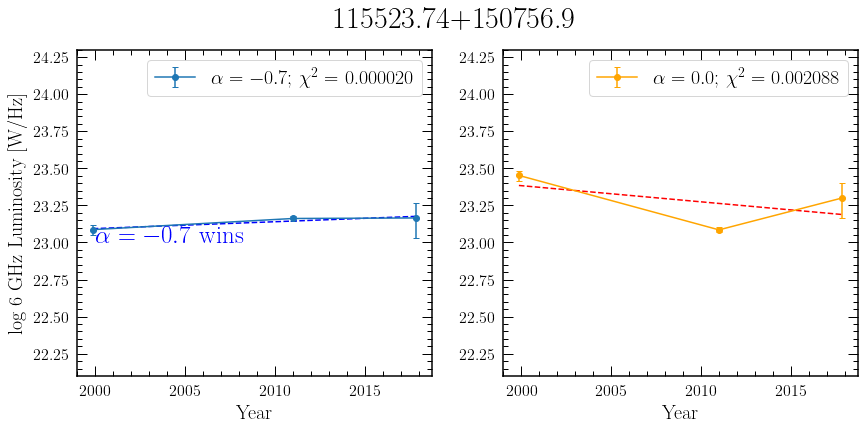

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


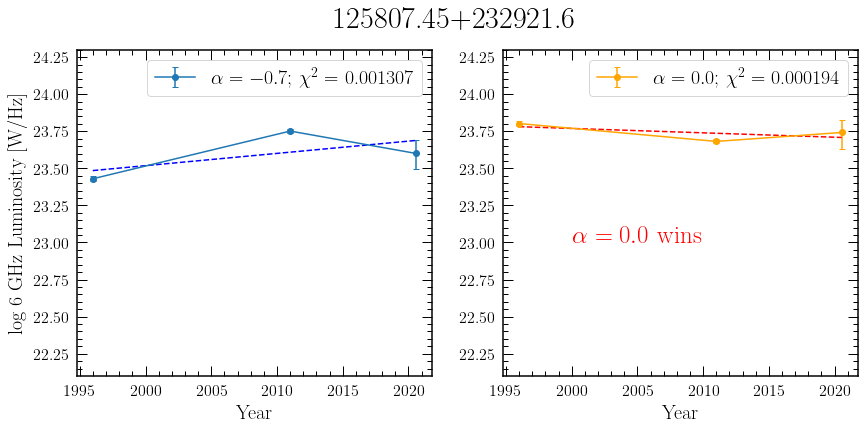

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


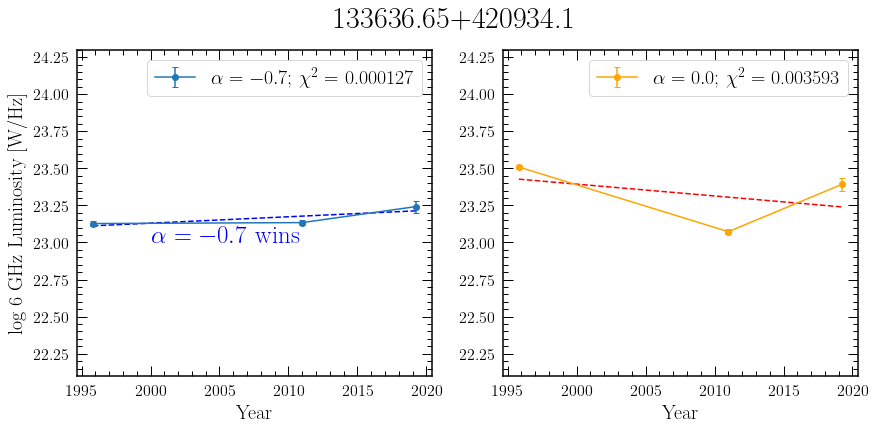

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


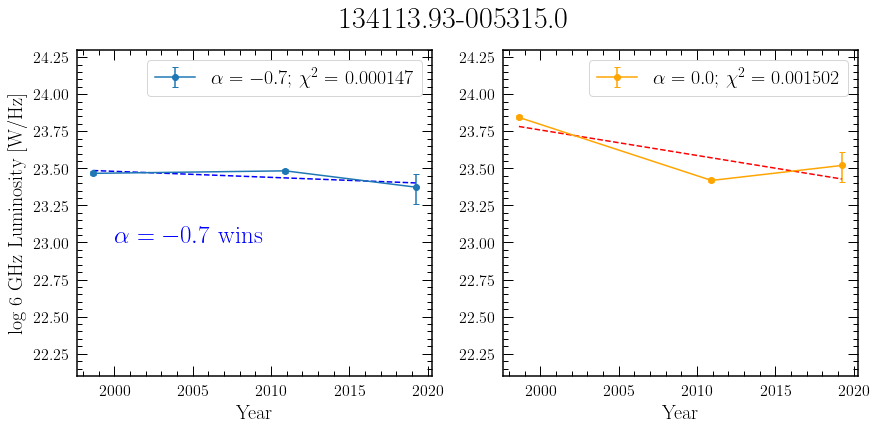

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


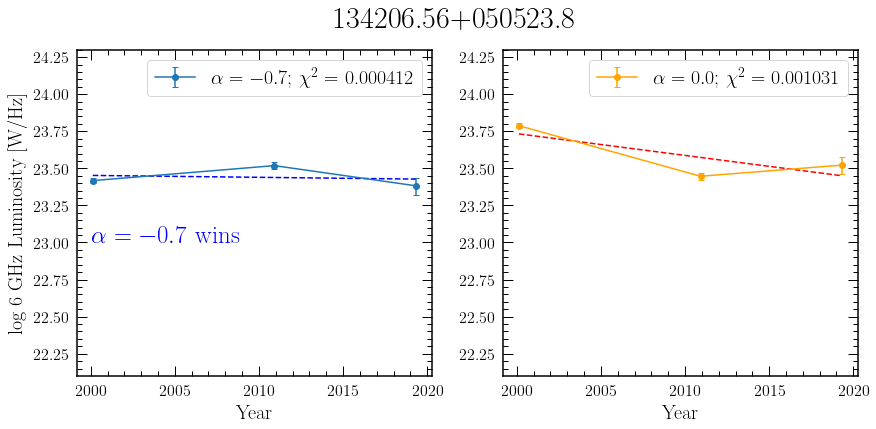

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


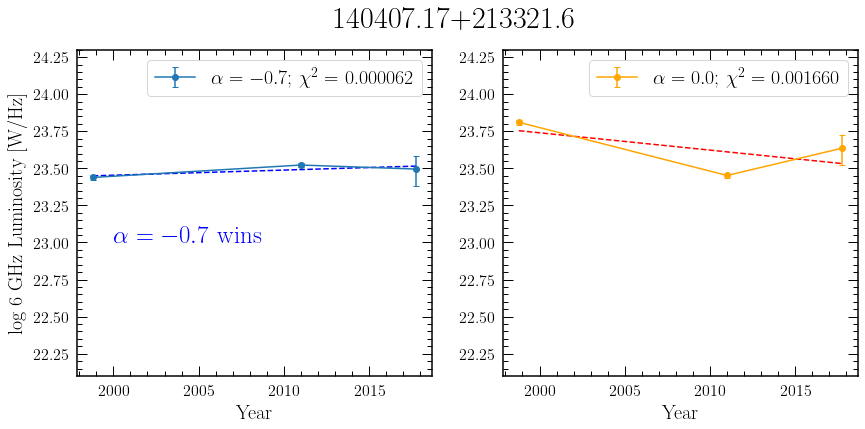

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


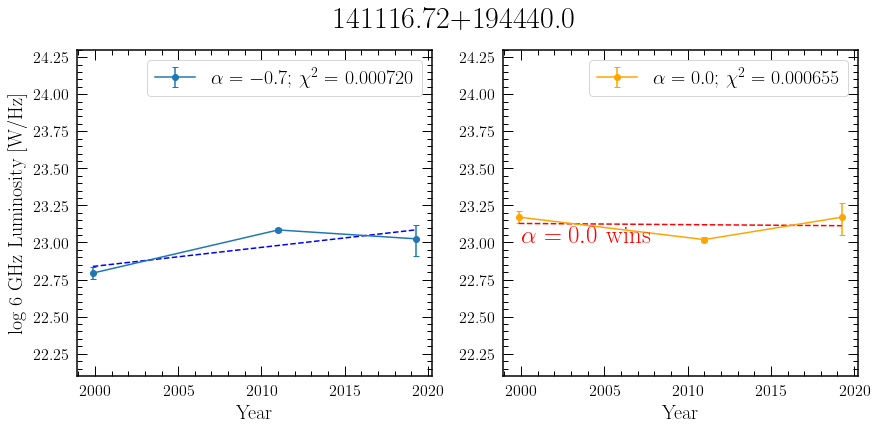

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


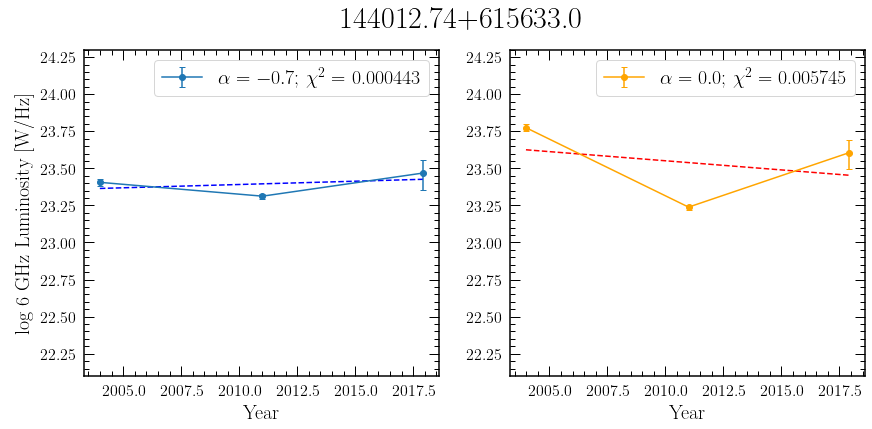

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


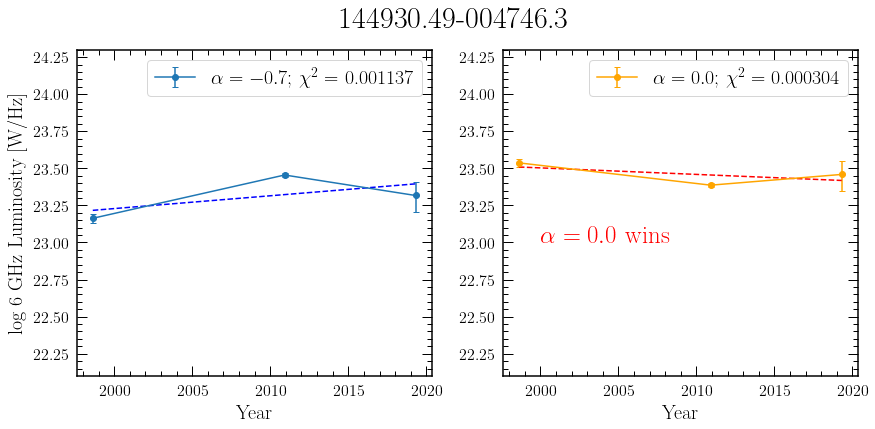

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


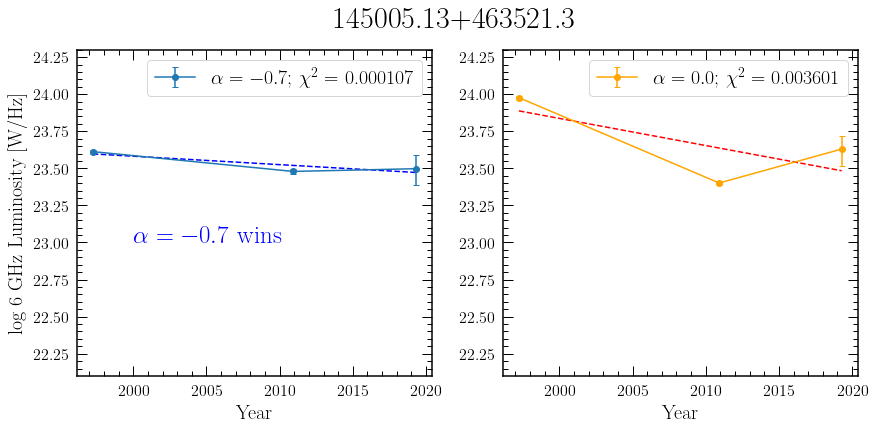

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


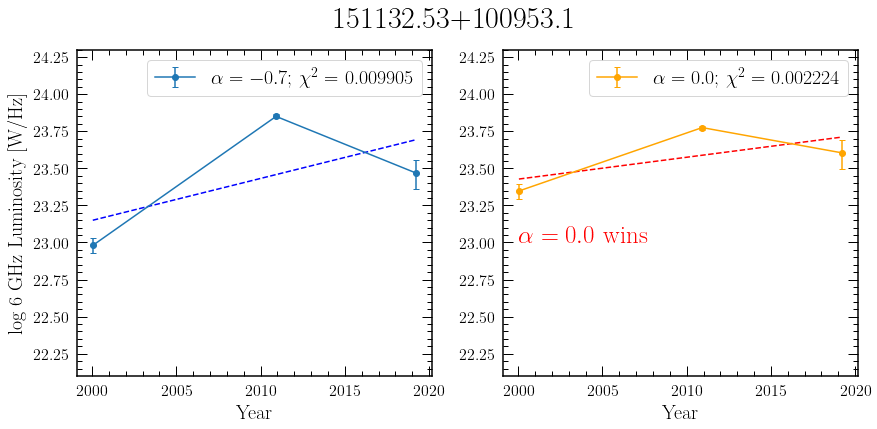

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


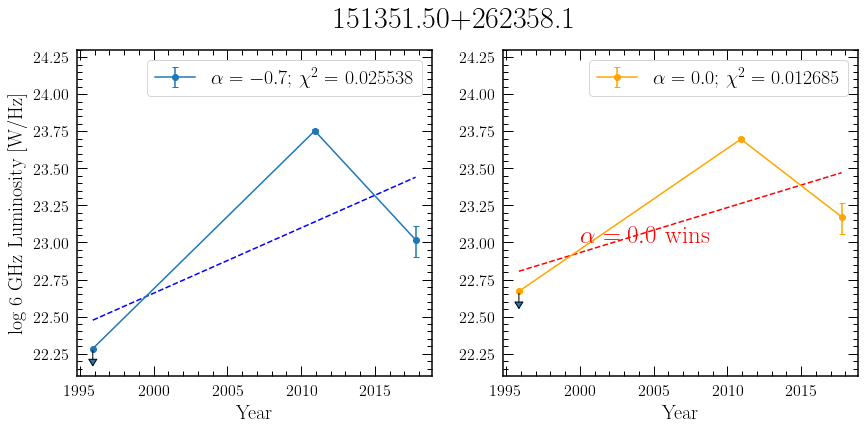

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


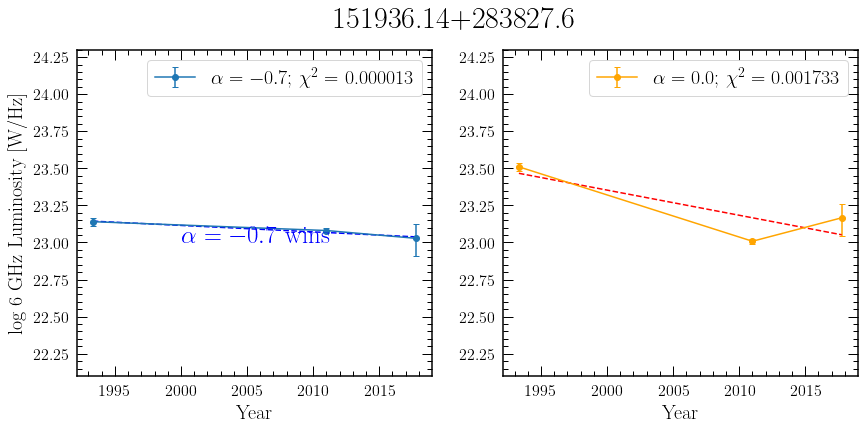

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


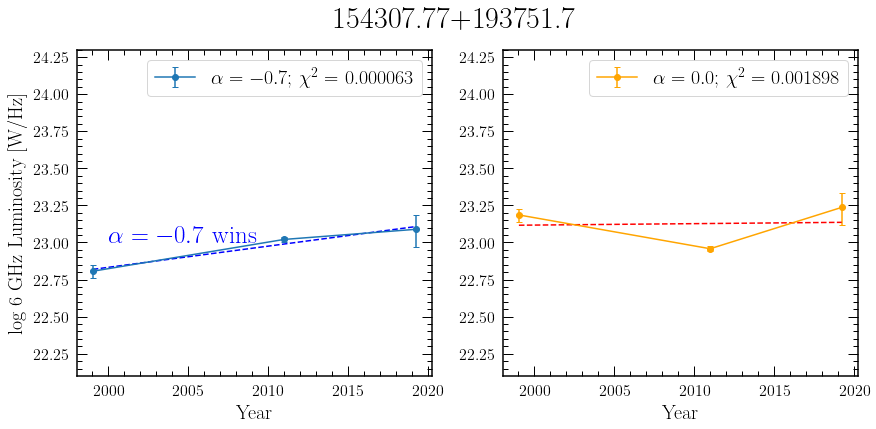

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


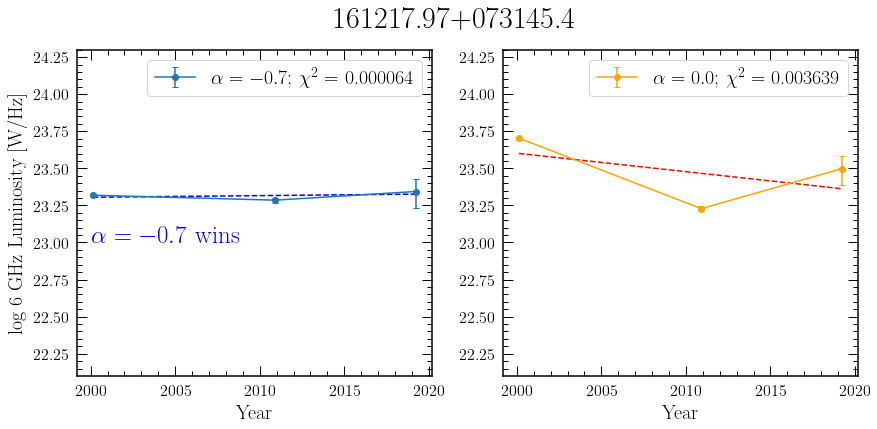

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


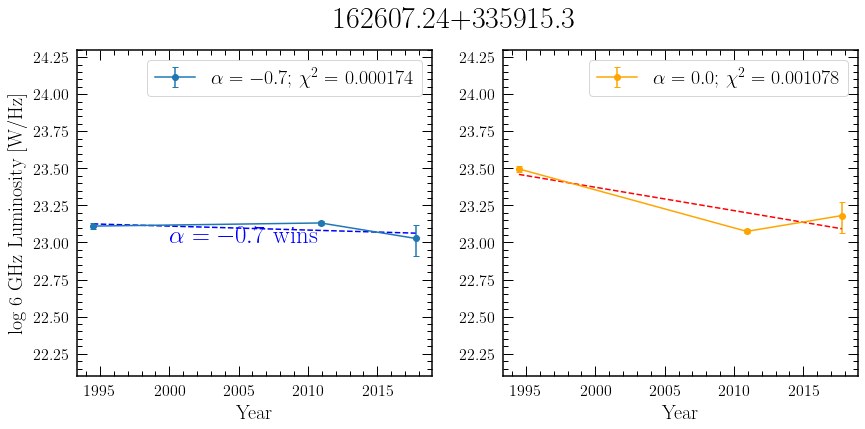

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


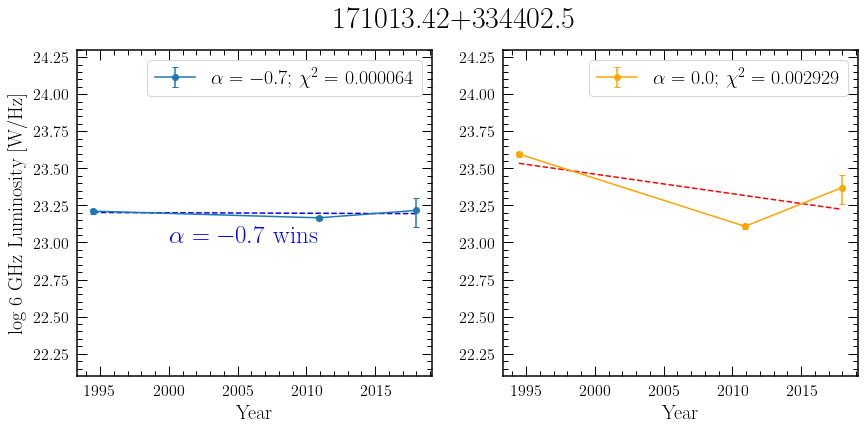

Radio-intermediate spectral index counts:

alpha=0.0 : 8
alpha=-0.7: 19


In [23]:
num0 = 0
num7 = 0

alpha_ri = np.zeros(len(data[RI]))

for i in range(len(data[RI])):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[RI][i][:3], dataup[RI][i][:3],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[RI][i][:3], data[RI][i][:3],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[RI][i][:3] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[RI][i][:3] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(dataup[RI][i][:3], y0)
    chisq_alphaminp7 = spstats.chisquare(data[RI][i][:3], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,23), color="blue", size=25)
        alpha_ri[i] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,23), color="red", size=25)
        alpha_ri[i] = 0.0
        
    #plot true luminosities and their fits for each alpha side by side
    axs[0].errorbar(x=dates_fit[RI][i][:3], y=data[RI][i][:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8, label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[RI][i][:3], y7, '--b')
    
    if (errs_ri[0][i]==0.).all():
        axs[0].annotate('', xy=(dates_fit[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        axs[1].annotate('', xy=(dates_fit[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    if (errs_ri[2][i]==0.).all():
        axs[0].annotate('', xy=(dates_fit[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        axs[1].annotate('', xy=(dates_fit[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
    
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(22.1, 24.3)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].errorbar(x=dates_fit[RI][i][:3], y=dataup[RI][i][:3], yerr=errs_ri[:,i].T, 
                 color="orange", fmt="-o", capsize=2.8, label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_fit[RI][i][:3], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(22.1, 24.3)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(sdss_names[RI][i], fontsize=30)
    plt.show()
    
print("Radio-intermediate spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)
alpha[RI] = alpha_ri

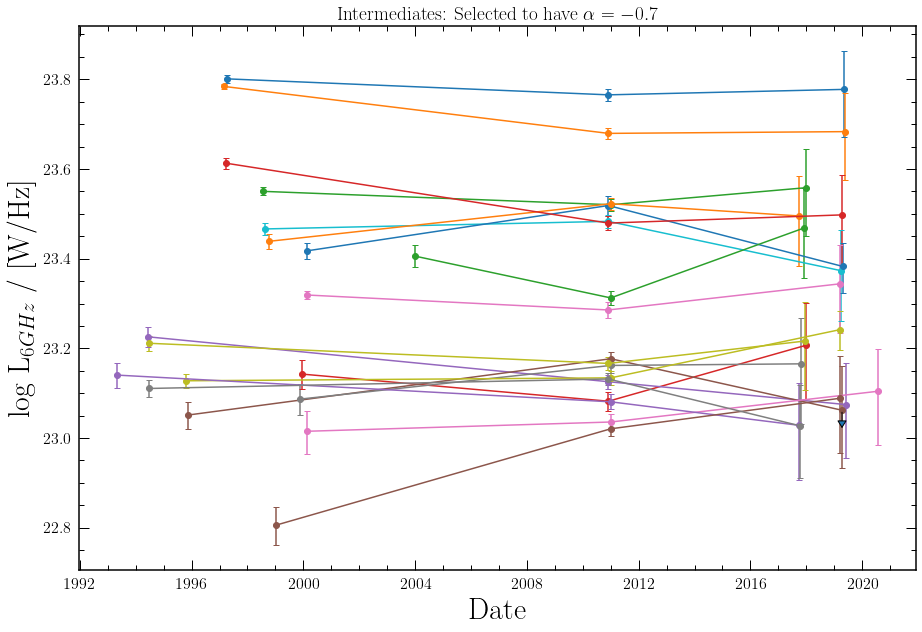

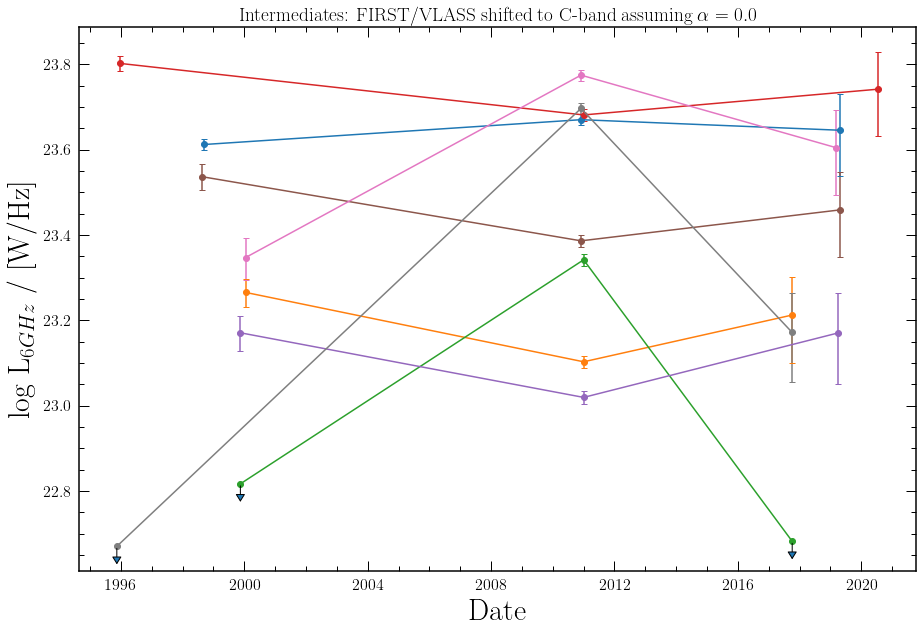

In [24]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RI][alpha[RI]==-0.7].shape[0]):
    plt.errorbar(x=dates[RI][alpha[RI]==-0.7][i][:3], y=data[RI][alpha[RI]==-0.7][i][:3], 
                 yerr=np.array([errs_ri[0][alpha_ri==-0.7][i], errs_ri[1][alpha_ri==-0.7][i], errs_ri[2][alpha_ri==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST non-detection
    if (errs_ri[0][alpha[RI]==-0.7][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==-0.7][i][0], data[RI][alpha[RI]==-0.7][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==-0.7][i][2], data[RI][alpha[RI]==-0.7][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Intermediates: Selected to have $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RI][alpha[RI]==0.0].shape[0]):
    plt.errorbar(x=dates[RI][alpha[RI]==0.0][i][:3], y=dataup[RI][alpha[RI]==0.0][i][:3], 
                 yerr=np.array([errs_ri[0][alpha_ri==0.0][i], errs_ri[1][alpha_ri==0.0][i], errs_ri[2][alpha_ri==0.0][i]]).T, 
                 fmt="-o", capsize=2.8)
    
    #Check if FIRST non-detection
    if (errs_ri[0][alpha[RI]==0.0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==0.0][i][0], dataup[RI][alpha[RI]==0.0][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][alpha[RI]==0.0][i]==0.).all():
        plt.annotate('', xy=(dates[RI][alpha[RI]==0.0][i][2], dataup[RI][alpha[RI]==0.0][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---

### Louds

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


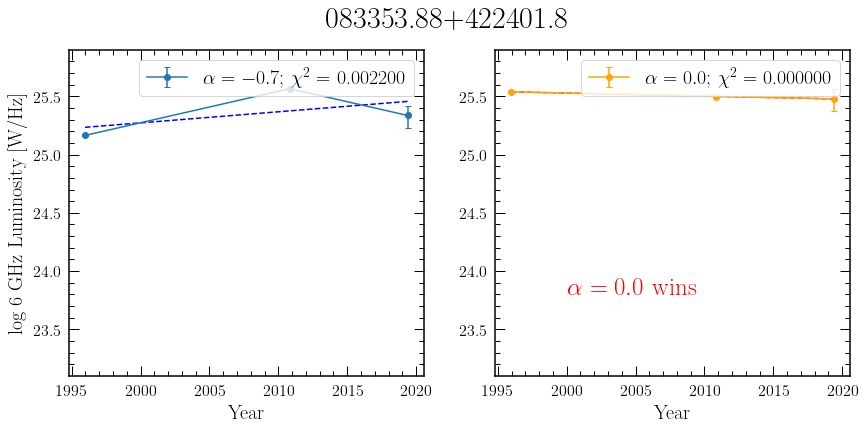

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


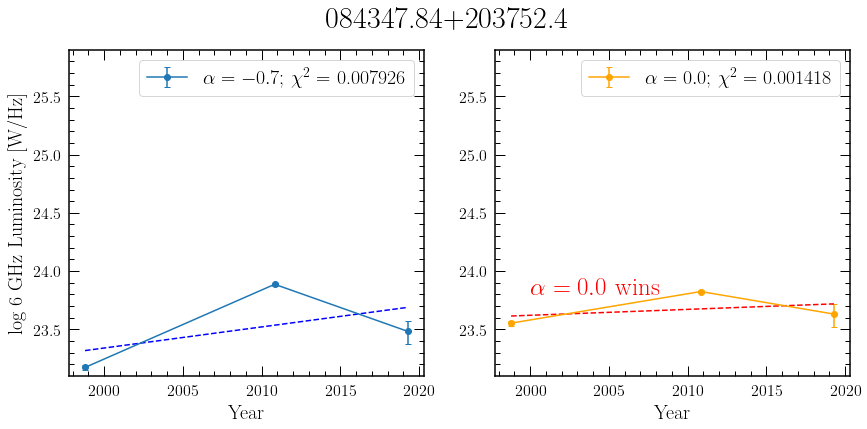

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


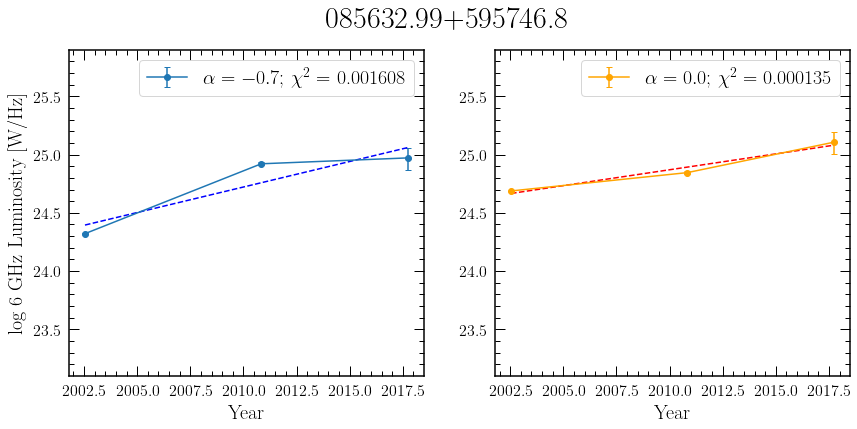

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


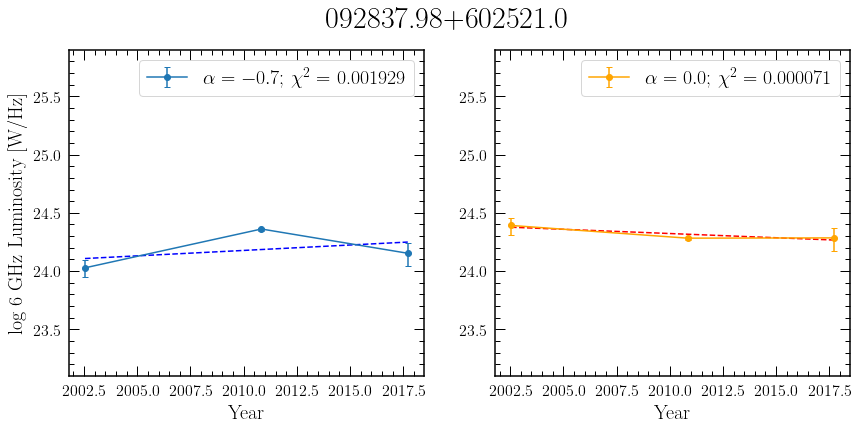

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


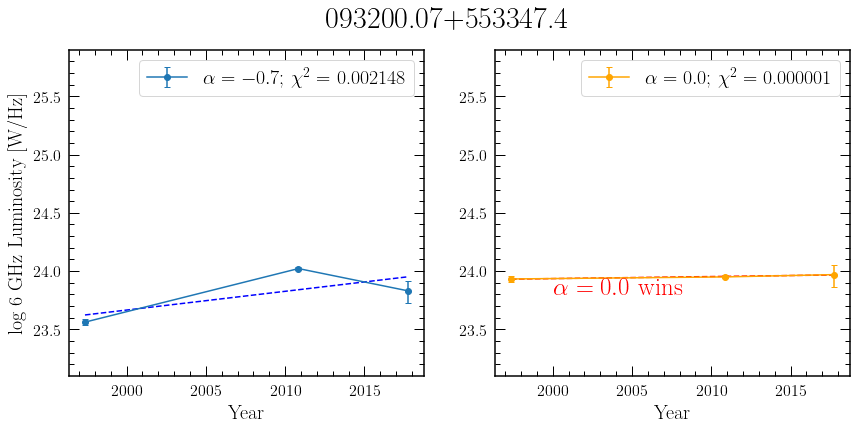

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


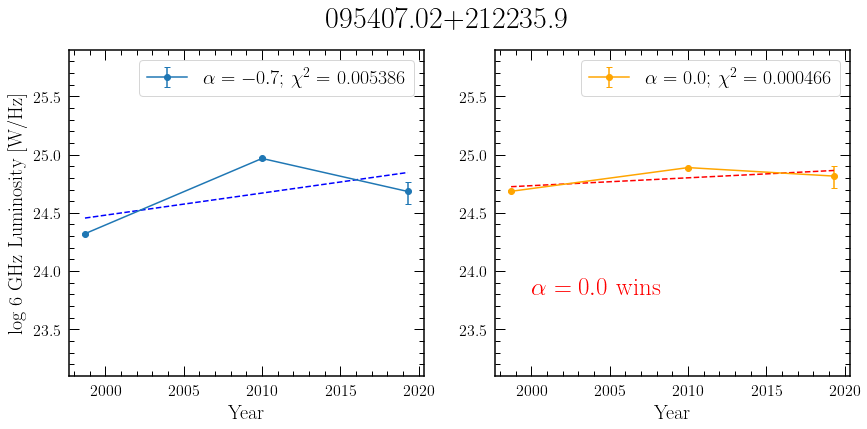

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


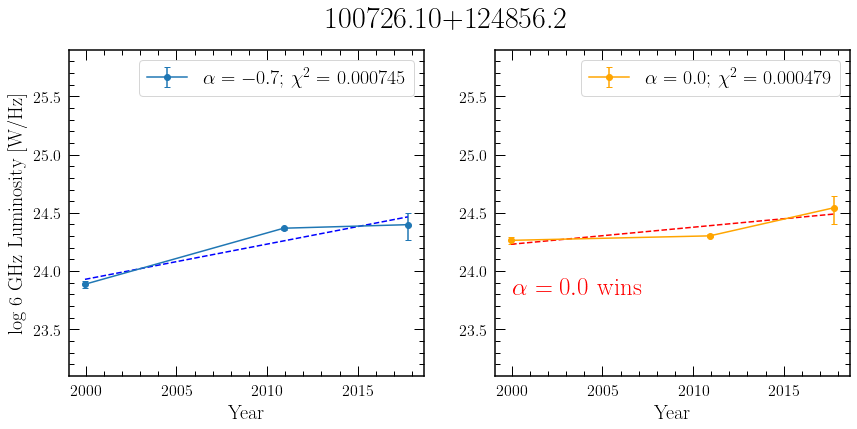

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


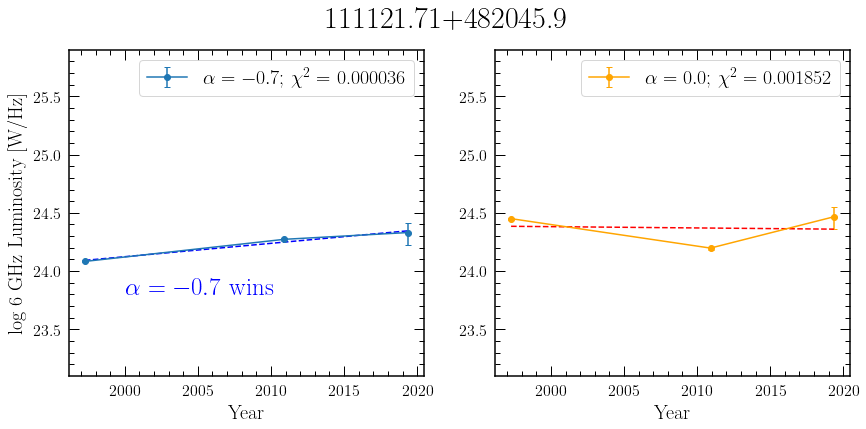

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


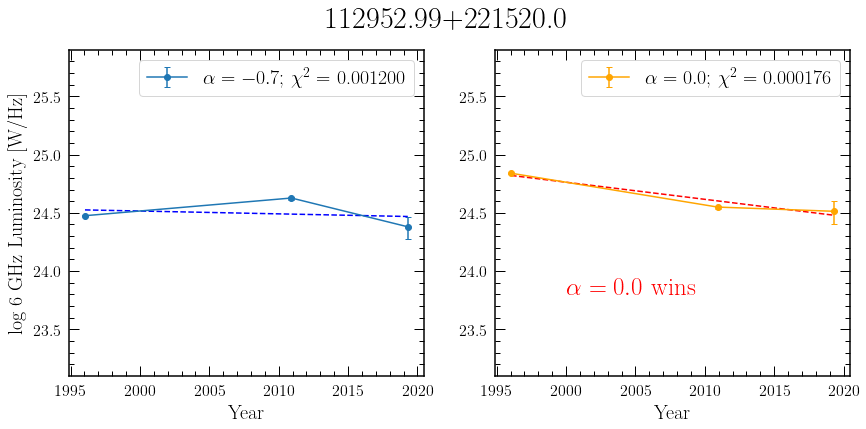

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


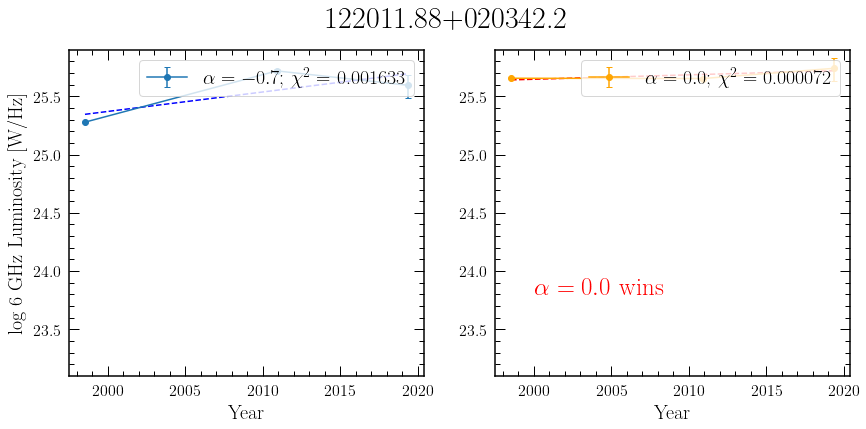

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


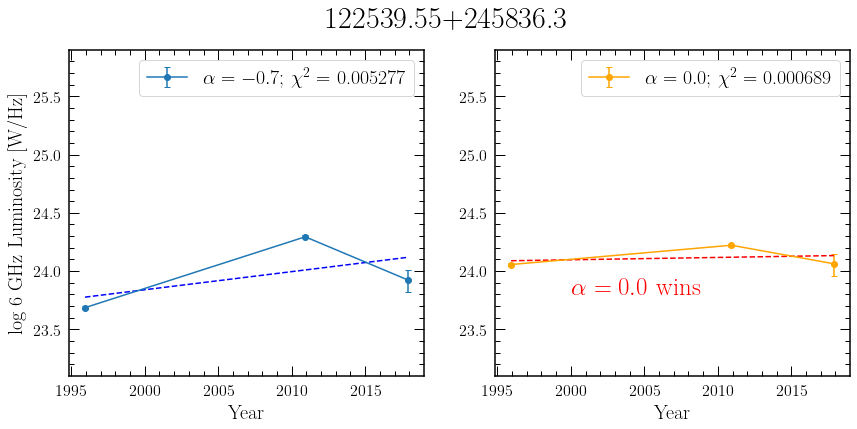

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


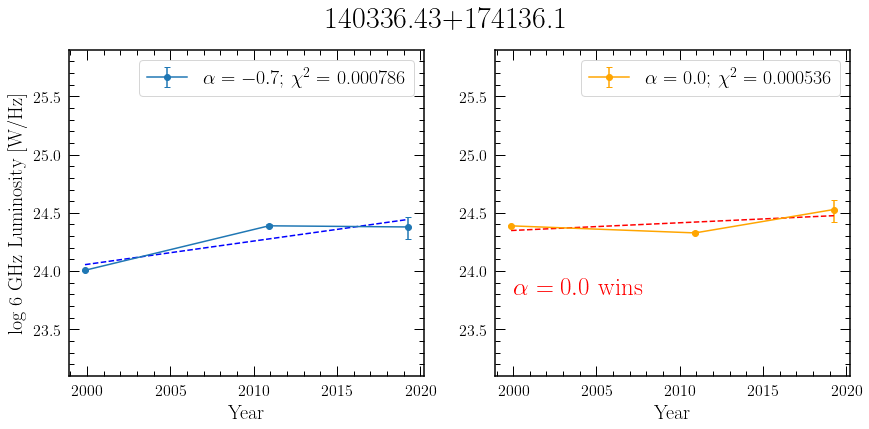

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


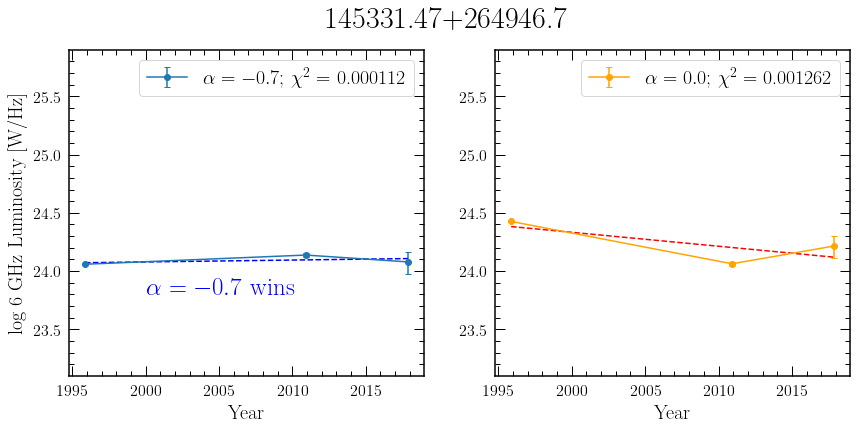

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


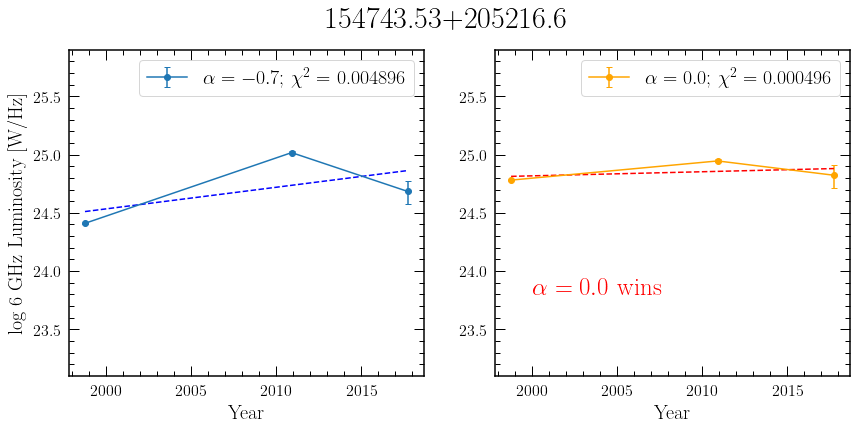

Radio-loud spectral index counts:

alpha=0.0 : 12
alpha=-0.7: 2


In [25]:
num0 = 0
num7 = 0

alpha_rl = np.zeros(len(data[RL]))

for i in range(len(data[RL])):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[RL][i][:3], dataup[RL][i][:3],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[RL][i][:3], data[RL][i][:3],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[RL][i][:3] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[RL][i][:3] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(dataup[RL][i][:3], y0)
    chisq_alphaminp7 = spstats.chisquare(data[RL][i][:3], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,23.8), color="blue", size=25)
        alpha_rl[i] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,23.8), color="red", size=25)
        alpha_rl[i] = 0.0
        
    #plot true luminosities and their fits for each alpha side by side
    axs[0].errorbar(x=dates_fit[RL][i][:3], y=data[RL][i][:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8, label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[RL][i][:3], y7, '--b')
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(23.1, 25.9)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].errorbar(x=dates_fit[RL][i][:3], y=dataup[RL][i][:3], yerr=errs_rl[:,i].T, 
                 color="orange", fmt="-o", capsize=2.8, label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_fit[RL][i][:3], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(23.1, 25.9)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(sdss_names[RL][i], fontsize=30)
    plt.show()
    
print("Radio-loud spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)
alpha[RL] = alpha_rl

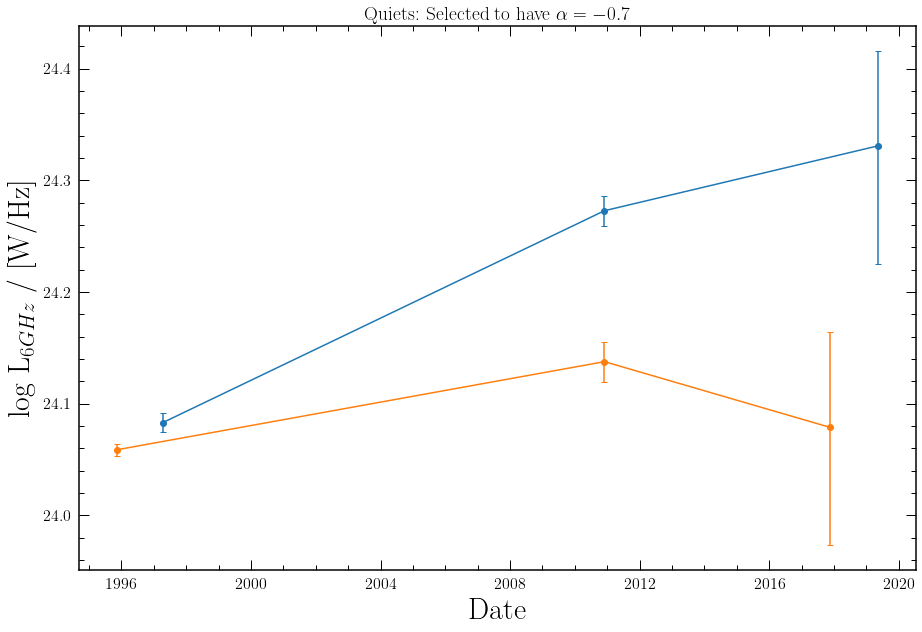

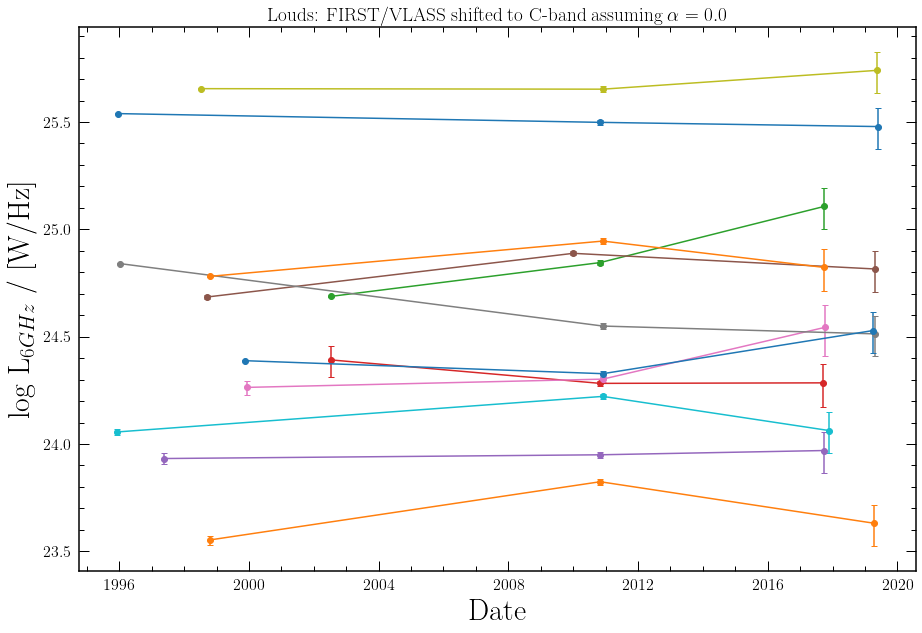

In [26]:
fig = plt.figure(figsize=(15,10))

for i in range(data[RL][alpha[RL]==-0.7].shape[0]):
    plt.errorbar(x=dates[RL][alpha[RL]==-0.7][i][:3], y=data[RL][alpha[RL]==-0.7][i][:3], 
                 yerr=np.array([errs_rl[0][alpha_rl==-0.7][i], errs_rl[1][alpha_rl==-0.7][i], errs_rl[2][alpha_rl==-0.7][i]]).T, 
                 fmt="-o", capsize=2.8)

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Quiets: Selected to have $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(dataup[RL][alpha[RL]==0.0].shape[0]):
    plt.errorbar(x=dates[RL][alpha[RL]==0.0][i][:3], y=dataup[RL][alpha[RL]==0.0][i][:3], 
                 yerr=np.array([errs_rl[0][alpha_rl==0.0][i], errs_rl[1][alpha_rl==0.0][i], errs_rl[2][alpha_rl==0.0][i]]).T, 
                 fmt="-o", capsize=2.8)

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Louds: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

---

Make summary plot of all light curves showing each choice of spectral index

In [27]:
data[RQ][:,3]

array([23.15109724, 22.66151863, 23.04485978, 22.86722857, 22.89336743,
       22.50866256, 22.97416993, 22.94020199, 22.91254535, 22.71721808,
       22.40645688, 22.58750272, 22.90826391, 22.85700743, 22.88327919,
       22.83562257, 22.35092074, 22.52171173, 22.661355  , 23.11659354,
       22.51227482, 22.55026598, 22.16143496, 22.59489384, 22.83425814,
       22.65218959, 22.92994622, 22.93935524, 22.94038608])

In [28]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [29]:
len(colors)

10

There are 10 colors in the default MPL color cycle; what I want in the cut-down version of the following figure is for the colors in each corresponding panel to remain uniform -- and not "keep looping through" on the color cycle 

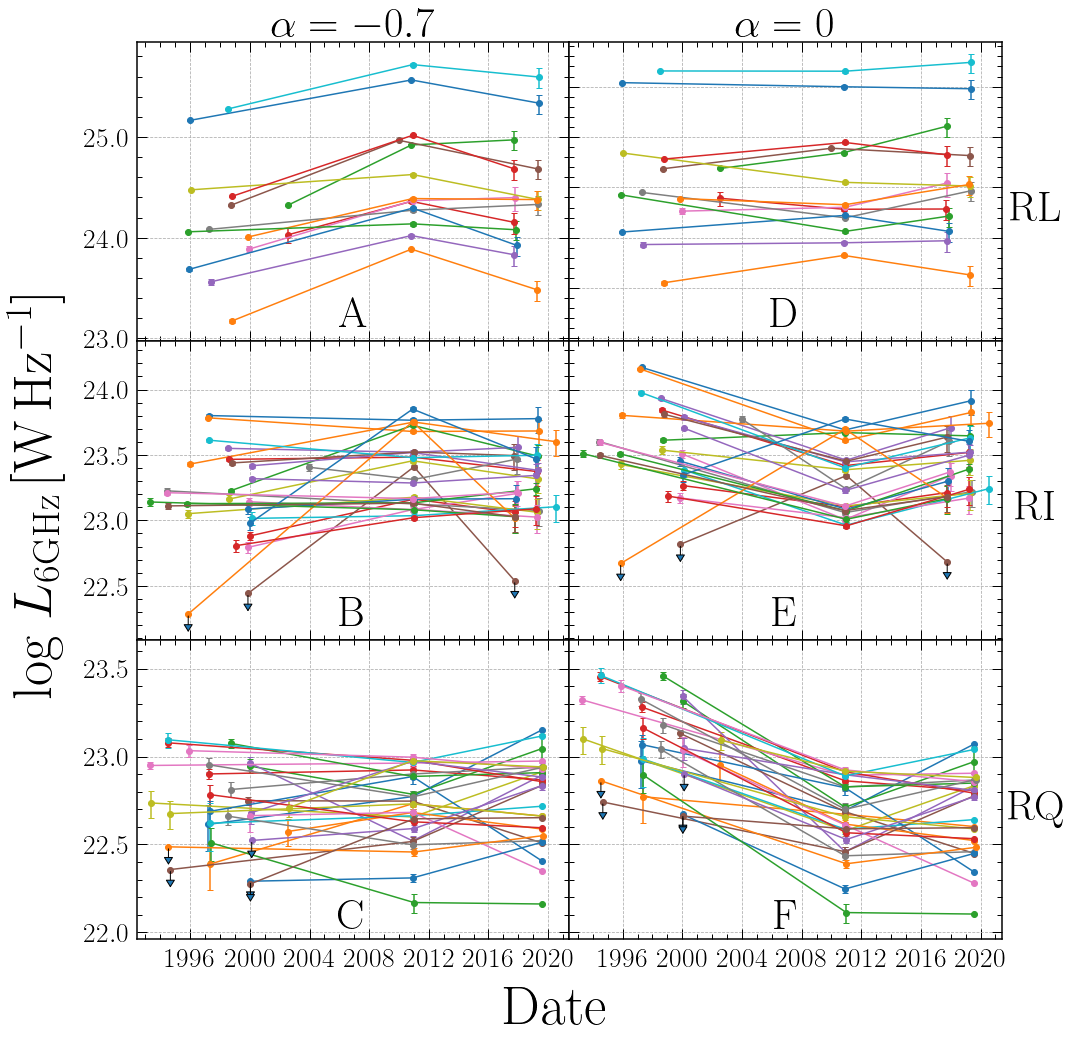

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(15.5, 16.5), gridspec_kw={"wspace":0, "hspace":0})


for i in range(data[RL].shape[0]):
    axs[0,0].errorbar(x=dates[RL][i,:3], y=data[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        axs[0,0].annotate('', xy=(dates[RL][i][0], data[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        axs[0,0].annotate('', xy=(dates[RL][i][2], data[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[0,0].set_xlabel("Date", fontsize=30)
#axs[0,0].set_ylabel("log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]", fontsize=42.5)
axs[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
axs[0,0].grid('on', linestyle='--')
axs[0,0].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[0,0].set_ylim(min(data[RL][:,0])-0.2, max(dataup[RL][:,2])+0.2)
axs[0,0].tick_params(axis='both', which='major', labelsize=27.5)
axs[0,0].set_xticklabels([])
axs[0,0].set_xlabel('$\\alpha=-0.7$', fontsize=42.5)    
axs[0,0].xaxis.set_label_position('top') 


for i in range(dataup[RL].shape[0]):
    axs[0,1].errorbar(x=dates[RL][i,:3], y=dataup[RL][i,:3], yerr=errs_rl[:,i].T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    #Check if FIRST is a non-detection
    if (errs_rl[0][i]==0.).all():
        axs[0,1].annotate('', xy=(dates[RL][i][0], dataup[RL][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_rl[2][i]==0.).all():
        axs[0,1].annotate('', xy=(dates[RL][i][2], dataup[RL][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[0,1].set_xlabel("Date", fontsize=32.5)
#axs[0,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[0,1].set_yticklabels([])
axs[0,1].set_yticklabels([])
axs[0,1].set_xlabel('$\\alpha=0$', fontsize=42.5)    
axs[0,1].xaxis.set_label_position('top') 
axs[0,1].set_ylabel("RL", fontsize=42.5, rotation=0, labelpad=35)
axs[0,1].yaxis.set_label_position("right")
axs[0,1].grid('on', linestyle='--')
axs[0,1].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[0,1].set_ylim(min(data[RL][:,0])-0.2, max(dataup[RL][:,2])+0.2)

for i in range(data[RI].shape[0]):
    axs[1,0].errorbar(x=dates[RI][i,:3], y=data[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        axs[1,0].annotate('', xy=(dates[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        axs[1,0].annotate('', xy=(dates[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[1,0].set_xlabel("Date", fontsize=30)
#axs[1,0].set_ylabel("log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]", fontsize=42.5)
axs[1,0].set_xlabel('A', fontsize=42.5, labelpad=15)    
axs[1,0].xaxis.set_label_position('top') 
axs[1,0].set_xticklabels([])
axs[1,0].grid('on', linestyle='--')
axs[1,0].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[1,0].set_ylim(min(data[RI][:,0])-0.2, max(dataup[RI][:,0])+0.2)
axs[1,0].tick_params(axis='both', which='major', labelsize=27.5)

for i in range(dataup[RI].shape[0]):
    axs[1,1].errorbar(x=dates[RI][i,:3], y=dataup[RI][i,:3], yerr=errs_ri[:,i].T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    #Check if FIRST is a non-detection
    if (errs_ri[0][i]==0.).all():
        axs[1,1].annotate('', xy=(dates[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
     
    #Check if VLASS is a non-detection
    if (errs_ri[2][i]==0.).all():
        axs[1,1].annotate('', xy=(dates[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[1,1].set_xlabel("Date", fontsize=30)
#axs[1,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[1,1].set_xlabel('D', fontsize=42.5, labelpad=15)    
axs[1,1].xaxis.set_label_position('top') 
axs[1,1].set_xticklabels([])
axs[1,1].set_yticklabels([])
axs[1,1].set_ylabel("RI", fontsize=42.5, rotation=0, labelpad=35)
axs[1,1].yaxis.set_label_position("right")
axs[1,1].grid('on', linestyle='--')
axs[1,1].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[1,1].set_ylim(22.5, 23.9)
axs[1,1].set_ylim(min(data[RI][:,0])-0.2, max(dataup[RI][:,0])+0.2)


for i in range(data[RQ].shape[0]):
    axs[2,0].errorbar(x=dates[RQ][i][novlass], y=data[RQ][i][novlass], yerr=errs_rq[:,i][novlass].T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    if (errs_rq[0][i]==0.).all():
        axs[2,0].annotate('', xy=(dates[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[2,0].set_xlabel("Date", fontsize=42.5)
#axs[2,0].set_ylabel("log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]", fontsize=42.5)
#axs[2,0].set_xticklabels([])
axs[2,0].set_xlabel('B', fontsize=42.5, labelpad=15)    
axs[2,0].xaxis.set_label_position('top') 
axs[2,0].grid('on', linestyle='--')
axs[2,0].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[2,0].set_ylim(min(data[RQ][:,3])-0.2, max(dataup[RQ][:,0])+0.2)
axs[2,0].tick_params(axis='both', which='major', labelsize=27.5)

for i in range(dataup[RQ].shape[0]):
    axs[2,1].errorbar(x=dates[RQ][i][novlass], y=dataup[RQ][i][novlass], yerr=errs_rq[:,i][novlass].T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    if (errs_rq[0][i]==0.).all():
        axs[2,1].annotate('', xy=(dates[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[2,1].set_xlabel("Date", fontsize=42.5)
#axs[2,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[2,1].set_xticklabels([])
axs[2,1].set_xlabel('E', fontsize=42.5, labelpad=15)    
axs[2,1].xaxis.set_label_position('top') 
axs[2,1].set_yticklabels([])
axs[2,1].set_ylabel("RQ", fontsize=42.5, rotation=0, labelpad=35)
axs[2,1].yaxis.set_label_position("right")
axs[2,1].grid('on', linestyle='--')
axs[2,1].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[2,1].set_ylim(min(data[RQ][:,3])-0.2, max(dataup[RQ][:,0])+0.2)

#Common y/x-axis label
fig.text(0.035, 0.5, 'log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]', ha='center', va='center', rotation='vertical', fontsize=55)
fig.text(0.5, 0.065, 'Date', ha='center', va='center', fontsize=55)

#Add C/F panel labels
fig.text(0.3175, 0.143, 'C', ha='center', va='center', fontsize=42.5)
fig.text(0.7075, 0.143, 'F', ha='center', va='center', fontsize=42.5)

plt.tick_params(axis='both', which='major', labelsize=27.5)
#plt.tight_layout()
plt.savefig("../PaperPlots/all_light_curves_werrors.pdf")
plt.show()

And another plot showing just the ones we "kept"

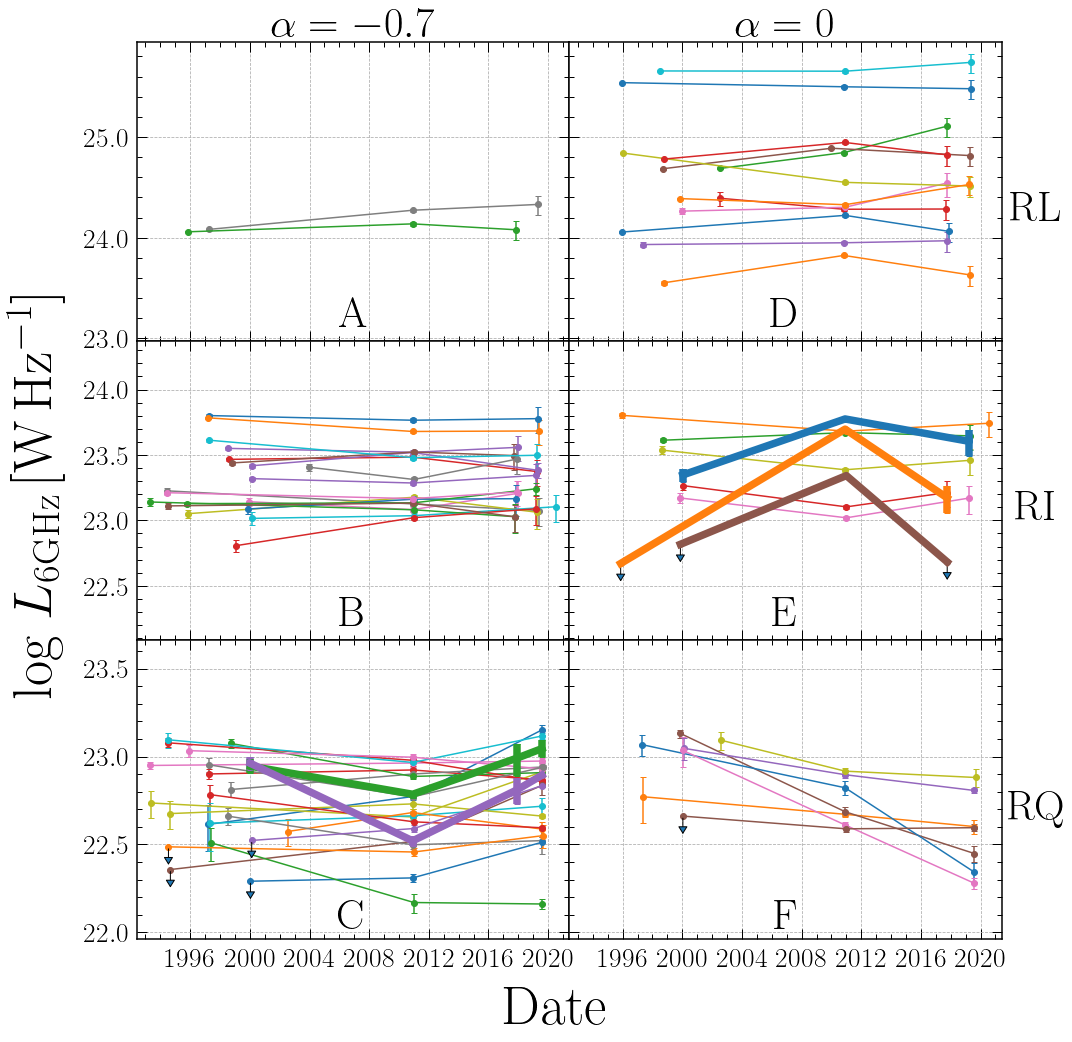

In [31]:
icolors = [] #save colors of interesting objects

fig, axs = plt.subplots(3, 2, figsize=(15.5, 16.5), gridspec_kw = {'wspace':0, 'hspace':0})

for i in range(data[RL].shape[0]):
    if alpha[RL][i]==-0.7:
        axs[0,0].errorbar(x=dates[RL][i][:3], y=data[RL][i][:3], 
                     yerr=np.array([errs_rl[0][i], errs_rl[1][i], errs_rl[2][i]]).T, 
                     fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
        
    else:
        axs[0,1].errorbar(x=dates[RL][i][:3], y=dataup[RL][i][:3], 
                 yerr=np.array([errs_rl[0][i], errs_rl[1][i], errs_rl[2][i]]).T, 
                 fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
        

#axs[0,0].set_xlabel("Date", fontsize=32.5)
#axs[0,0].set_ylabel("log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]", fontsize=42.5)
axs[0,0].yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
axs[0,0].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[0,0].set_ylim(min(data[RL][:,0])-0.2, max(dataup[RL][:,2])+0.2)
axs[0,0].set_xticklabels([])
axs[0,0].grid('on', linestyle='--')
axs[0,0].tick_params(axis='both', which='major', labelsize=27.5)
axs[0,0].set_xlabel('$\\alpha=-0.7$', fontsize=42.5)    
axs[0,0].xaxis.set_label_position('top') 
#axs[0,0].xaxis.tick_top()

#axs[0,1].set_xlabel("Date", fontsize=32.5)
#axs[0,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[0,1].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[0,1].set_ylim(min(data[RL][:,0])-0.2, max(dataup[RL][:,2])+0.2)
axs[0,1].set_xticklabels([])
axs[0,1].set_yticklabels([])
axs[0,1].set_ylabel("RL", fontsize=42.5, rotation=0, labelpad=35)
axs[0,1].yaxis.set_label_position("right")
#axs[0,1].yaxis.tick_right()
axs[0,1].grid('on', linestyle='--')
axs[0,1].tick_params(axis='both', which='major', labelsize=27.5)
axs[0,1].set_xlabel('$\\alpha=0$', fontsize=42.5)    
axs[0,1].xaxis.set_label_position('top') 
#axs[0,1].xaxis.tick_top()


for i in range(data[RI].shape[0]):
    if sdss_names[RI][i] in special:
        icolors.append(colors[i%(len(colors))])
        if alpha[RI][i]==-0.7:
            axs[1,0].errorbar(x=dates[RI][i][:3], y=data[RI][i][:3], 
                 yerr=np.array([errs_ri[0][i], errs_ri[1][i], errs_ri[2][i]]).T, 
                 fmt="-o", capsize=2.8, linewidth=7.5, color=colors[i%(len(colors))], zorder=3)
        else:
            axs[1,1].errorbar(x=dates[RI][i][:3], y=dataup[RI][i][:3], 
                 yerr=np.array([errs_ri[0][i], errs_ri[1][i], errs_ri[2][i]]).T, 
                 fmt="-o", capsize=2.8, linewidth=7.5, color=colors[i%(len(colors))], zorder=3)
    else:
        if alpha[RI][i]==-0.7:
            axs[1,0].errorbar(x=dates[RI][i][:3], y=data[RI][i][:3], 
                         yerr=np.array([errs_ri[0][i], errs_ri[1][i], errs_ri[2][i]]).T, 
                         fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
        else:
            axs[1,1].errorbar(x=dates[RI][i][:3], y=dataup[RI][i][:3], 
                         yerr=np.array([errs_ri[0][i], errs_ri[1][i], errs_ri[2][i]]).T, 
                         fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    #Check if FIRST non-detection
    if (errs_ri[0][i]==0.).all():
        if alpha[RI][i]==-0.7:
            axs[1,0].annotate('', xy=(dates[RI][i][0], data[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        else:
            axs[1,1].annotate('', xy=(dates[RI][i][0], dataup[RI][i][0]), xytext=(0, -20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        
    #Check if VLASS non-detection
    if (errs_ri[2][i]==0.).all():
        if alpha[RI][i]==-0.7:
            axs[1,0].annotate('', xy=(dates[RI][i][2], data[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        else:
            axs[1,1].annotate('', xy=(dates[RI][i][2], dataup[RI][i][2]), xytext=(0, -20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[1,0].set_xlabel("Date", fontsize=30)
#axs[1,0].set_ylabel("log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]", fontsize=42.5)
axs[1,0].set_xlabel('A', fontsize=42.5, labelpad=15)    
axs[1,0].xaxis.set_label_position('top') 
axs[1,0].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[1,0].set_ylim(min(data[RI][:,0])-0.2, max(dataup[RI][:,0])+0.2)
axs[1,0].set_xticklabels([])
axs[1,0].grid('on', linestyle='--')
axs[1,0].tick_params(axis='both', which='major', labelsize=27.5)

#axs[1,1].set_xlabel("Date", fontsize=30)
#axs[1,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[1,1].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[1,1].set_ylim(min(data[RI][:,0])-0.2, max(dataup[RI][:,0])+0.2)
axs[1,1].set_xticklabels([])
axs[1,1].set_yticklabels([])
axs[1,1].grid('on', linestyle='--')
axs[1,1].set_ylabel("RI", fontsize=42.5, rotation=0, labelpad=35)
axs[1,1].yaxis.set_label_position("right")
axs[1,1].set_xlabel('D', fontsize=42.5, labelpad=15)    
axs[1,1].xaxis.set_label_position('top') 
#axs[1,1].yaxis.tick_right()


for i in range(data[RQ].shape[0]):
    if sdss_names[RQ][i] in special:
        icolors.append(colors[i%(len(colors))])
        if alpha[RQ][i]==-0.7:
            axs[2,0].errorbar(x=dates[RQ][i], y=data[RQ][i], 
                         yerr=np.array([errs_rq[0][i], errs_rq[1][i], errs_rq[3][i], errs_rq[2][i]/2.]).T, 
                         fmt="-o", capsize=2.8, linewidth=7.5, color=colors[i%(len(colors))], zorder=3)
        else:
            axs[2,1].errorbar(x=dates[RQ][i][novlass], y=dataup[RQ][i][novlass], 
                         yerr=np.array([errs_rq[0][i], errs_rq[1][i], errs_rq[2][i]]).T, 
                         fmt="-o", capsize=2.8, linewidth=7.5, color=colors[i%(len(colors))], zorder=3)
    else:
        if alpha[RQ][i]==-0.7:
            axs[2,0].errorbar(x=dates[RQ][i][novlass], y=data[RQ][i][novlass], 
                     yerr=np.array([errs_rq[0][i], errs_rq[1][i], errs_rq[2][i]]).T, 
                     fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
        else:
            axs[2,1].errorbar(x=dates[RQ][i][novlass], y=dataup[RQ][i][novlass], 
                     yerr=np.array([errs_rq[0][i], errs_rq[1][i], errs_rq[2][i]]).T, 
                     fmt="-o", capsize=2.8, color=colors[i%(len(colors))])
    
    #Check if FIRST is a non-detection
    if (errs_rq[0][i]==0.).all():
        if alpha[RQ][i]==-0.7:
            axs[2,0].annotate('', xy=(dates[RQ][i][0], data[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))
        else:
            axs[2,1].annotate('', xy=(dates[RQ][i][0], dataup[RQ][i][0]), xytext=(0, -20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="<|-, head_width=0.25, head_length=0.4"))

#axs[2,0].set_xlabel("Date", fontsize=42.5)
#axs[2,0].set_ylabel("log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]", fontsize=42.5)
axs[2,0].set_xlabel('B', fontsize=42.5, labelpad=15)    
axs[2,0].xaxis.set_label_position('top')
axs[2,0].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[2,0].set_ylim(min(data[RQ][:,3])-0.2, max(dataup[RQ][:,0])+0.2)
#axs[2,0].set_xticklabels([])
axs[2,0].grid('on', linestyle='--')
axs[2,0].tick_params(axis='both', which='major', labelsize=27.5)

#axs[2,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
axs[2,1].set_xlim(dt.datetime.strptime("1992-6-1",'%Y-%m-%d').date(), dt.datetime.strptime("2021-6-1",'%Y-%m-%d').date())
axs[2,1].set_ylim(min(data[RQ][:,3])-0.2, max(dataup[RQ][:,0])+0.2)
#axs[2,1].set_xticklabels([])
axs[2,1].set_yticklabels([])
axs[2,1].grid('on', linestyle='--')
axs[2,1].set_ylabel("RQ", fontsize=42.5, rotation=0, labelpad=35)
axs[2,1].yaxis.set_label_position("right")
#axs[2,1].yaxis.tick_right()
#axs[2,1].set_xlabel("Date", fontsize=42.5)
axs[2,1].set_xlabel('E', fontsize=42.5, labelpad=15)    
axs[2,1].xaxis.set_label_position('top') 
axs[2,1].tick_params(axis='both', which='major', labelsize=27.5)

#Common y/x-axis label
fig.text(0.035, 0.5, 'log $L_\mathrm{6GHz}$\,[W\,Hz$^{-1}$]', ha='center', va='center', rotation='vertical', fontsize=55)
fig.text(0.5, 0.065, 'Date', ha='center', va='center', fontsize=55)

#Add C/F panel labels
fig.text(0.3175, 0.143, 'C', ha='center', va='center', fontsize=42.5)
fig.text(0.7075, 0.143, 'F', ha='center', va='center', fontsize=42.5)

#plt.tight_layout()
plt.savefig("../PaperPlots/all_light_curves_byalpha.pdf")
plt.show()

In [32]:
#To be completed: add back flux densities for sources in Panel F
np.median(dataup[RQ][alpha[RQ]==0.0][:,3]), np.median(dataup[RQ][alpha[RQ]==0.0][:,3]) + np.median(dataup[RQ][alpha[RQ]==0.0][:,1] - dataup[RQ][alpha[RQ]==0.0][:,3])

(22.5952464728303, 22.6848780206078)

In [33]:
(10**22.6848780206078/10**22.5952464728303)

1.229225462527445

In [34]:
alpha[RL][0]

0.0

In [35]:
df["Alpha"] = alpha
df.to_csv("all_var_figs.csv", index=False)
df

Name      z  S1p4_FCat  S1p4_Fcat_e  S1p4_FIRST  S1p4_err  \
0   083353.88+422401.8  0.249     229.81     0.145109      229810       145   
1   084347.84+203752.4  0.227       3.11     0.151364        3110       151   
2   085632.99+595746.8  0.283      25.04     0.155956       25040       155   
3   092837.98+602521.0  0.295        NaN          NaN       11750      1941   
4   093200.07+553347.4  0.266       5.22     0.099172        5220        99   
..                 ...    ...        ...          ...         ...       ...   
65  161711.42+063833.4  0.229        NaN          NaN         630         0   
66  161723.67+085414.7  0.206        NaN          NaN         450         0   
67  161940.56+254323.0  0.269       1.66     0.141143        1660       141   
68  162750.54+473623.5  0.262       1.48     0.136389        1480       136   
69  172711.80+632242.1  0.217       1.36     0.140837        1360       140   

        S6_FIRST  S6_FIRST_err  S6_FIRST_alpha0  S6_FIRST_alpha0_err  ...  \
0   82889.378614    151.646727         229570.0                420.0  ...   
1    1036.252632     50.548909           2870.0                140.0  ...   
2    8950.767504     64.991454          24790.0                180.0  ...   
3    4152.231799    686.020906          11500.0               1900.0  ...   
4    1787.264992    104.708454           4950.0                290.0  ...   
..           ...           ...              ...                  ...  ...   
65    227.470090      0.000000            630.0                  0.0  ...   
66    162.478636      0.000000            450.0                  0.0  ...   
67    516.320998     39.717000           1430.0                110.0  ...   
68    454.940180     39.717000           1260.0                110.0  ...   
69    393.559362     46.938273           1090.0                130.0  ...   

    S6_Aconfig  S6_Aconfig_err  L6_Aconfig  L6_Aconfig_alpha0  \
0          NaN             NaN    0.000000           0.000000   
1          NaN             NaN    0.000000           0.000000   
2          NaN             NaN    0.000000           0.000000   
3          NaN             NaN    0.000000           0.000000   
4          NaN             NaN    0.000000           0.000000   
..         ...             ...         ...                ...   
65       466.2        7.100000   22.834258          22.771572   
66       386.7       18.164801   22.652190          22.595246   
67       407.0       21.633308   22.929946          22.857523   
68       441.0       12.000000   22.939355          22.868614   
69       670.0       82.000000   22.940386          22.880683   

   L6_Aconfig_uplim  L6_Aconfig_lolim  DATE_VLAA  CLASS  Alpha  VAR  
0          0.000000          0.000000    \nodata     RL    0.0  0.0  
1          0.000000          0.000000    \nodata     RL    0.0  1.0  
2          0.000000          0.000000    \nodata     RL    0.0  0.0  
3          0.000000          0.000000    \nodata     RL    0.0  0.0  
4          0.000000          0.000000    \nodata     RL    0.0  0.0  
..              ...               ...        ...    ...    ...  ...  
65         0.006564         -0.006665    2019-08     RQ   -0.7  0.0  
66         0.019936         -0.020895    2019-08     RQ    0.0  0.0  
67         0.022492         -0.023720    2019-08     RQ   -0.7  0.0  
68         0.011660         -0.011981    2019-09     RQ   -0.7  0.0  
69         0.050143         -0.056697    2019-09     RQ    0.0  0.0  

[70 rows x 45 columns]

## 9/14/2020:  Now I want to further pick out which sources are not well fit by either choice of spectral index

In [36]:
#Name the quasars not well fit
inames = ["101719.02+151620.8", "151132.53+100953.1", "151351.50+262358.1",
         "085640.78+105755.8", "100033.88+104723.7"]

#An array indexing which have vlass measurements
ivlass = np.array([True, True, True, False, False])

In [37]:
interest = df.loc[df['Name'].isin(inames)]
idata    = dataup[df['Name'].isin(inames)][ivlass] #save alpha=0 for RIQs
idata    = np.vstack([idata, data[df['Name'].isin(inames)][~ivlass]])
idates   = dates_fit[df['Name'].isin(inames)]
iz       = z[df['Name'].isin(inames)]

In [38]:
idata

array([[22.8169789 , 23.34216773, 22.68228033,  0.        ],
       [23.34736506, 23.77504473, 23.60491733,  0.        ],
       [22.67047746, 23.69704348, 23.17266826,  0.        ],
       [22.94494377, 22.78530003, 22.99      , 23.04485978],
       [22.96108746, 22.52043963, 22.81      , 22.89336743]])

In [39]:
#Collect the RI errors and store in plotting array
ierr_ri_first = np.concatenate((L6_first_err[(df['Name'].isin(inames))&RI].T, np.array([[-99,-99]]).T), axis=1)
ierr_ri_kell  = np.concatenate((L6_kell_err[(df['Name'].isin(inames))&RI].T, np.array([[-99,-99]]).T), axis=1)
ierr_ri_vlass = np.concatenate((L6_vlass_err[(df['Name'].isin(inames))&RI].T, np.array([[-99,-99]]).T), axis=1)

ierr = np.vstack((ierr_ri_first, ierr_ri_kell, ierr_ri_vlass)).reshape(3, 2, 4)

#Collect errors for one RQ source separately
ierr_rq_first = L6_first_err[(df['Name'].isin(inames))&RQ].T
ierr_rq_kell  = L6_kell_err[(df['Name'].isin(inames))&RQ].T
ierr_rq_vlass = L6_vlass_err[(df['Name'].isin(inames))&RQ].T
ierr_rq_A     = L6_Aconfig_err[(df['Name'].isin(inames))&RQ].T
qerr = np.array([ierr_rq_first, ierr_rq_kell, ierr_rq_vlass, ierr_rq_A]).T

ierr = np.vstack((ierr, qerr))

In [40]:
ierr[0][:,:-1]

array([[0.        , 0.05258348, 0.        ],
       [0.        , 0.04689887, 0.        ]])

In [41]:
def same_name(full_name):
    return full_name[:4]+full_name[9:14]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


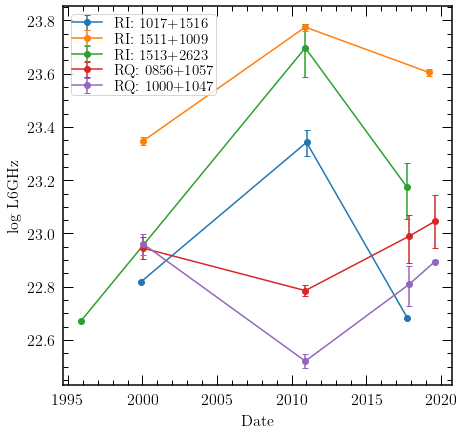

In [42]:
for i in range(len(idata)):
    if ivlass[i]:
        plt.errorbar(idates[i][0:-1], idata[i][0:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                     fmt="-o", label="RI: {}".format(same_name(inames[i])))
        
    else:
        plt.errorbar(idates[i], idata[i], yerr=ierr[i], capsize=2.8, fmt="-o", label="RQ: {}".format(same_name(inames[i])))
        

        
plt.legend(loc="best", labelspacing=0.05, borderpad=0.1, prop={"size": 15})
plt.xlabel("Date")
plt.ylabel("log L6GHz")
plt.show()

We'd usually start out with a flux density at $\nu_1$ and use the spectral index to convert that flux density then luminosity ... I'm going o start with the luminosities obtained using $\alpha=-0.7$ for the sake of consistency in my code and convert accordingly.  Write a function to do this

In [43]:
def ialpha(L_nu1, nu1, nu2, alpha, z, minp7=True):
    #Convert a luminosity that was computed assuming alpha=-0.7 back to its
    #flux at nu2 and get a new value at nu1
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L_nu1 = 10.**L_nu1 #convert to linear units 
    S_nu2 = L_nu1 * (nu2/nu1)**(-0.7) * (((1.+z)**(1.+-0.7))/(4*np.pi*DL**2)) * 1.e36 if minp7 else L_nu1 * (nu2/nu1)**(-0.0) * (((1.+z)**(1.+-0.0))/(4*np.pi*DL**2)) * 1.e36
    return radluminosity(nu1, nu2, S_nu2, alpha, z)

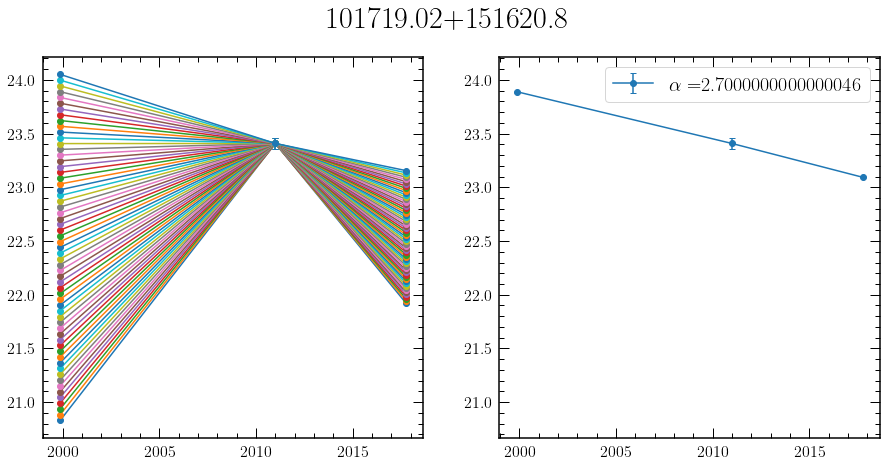

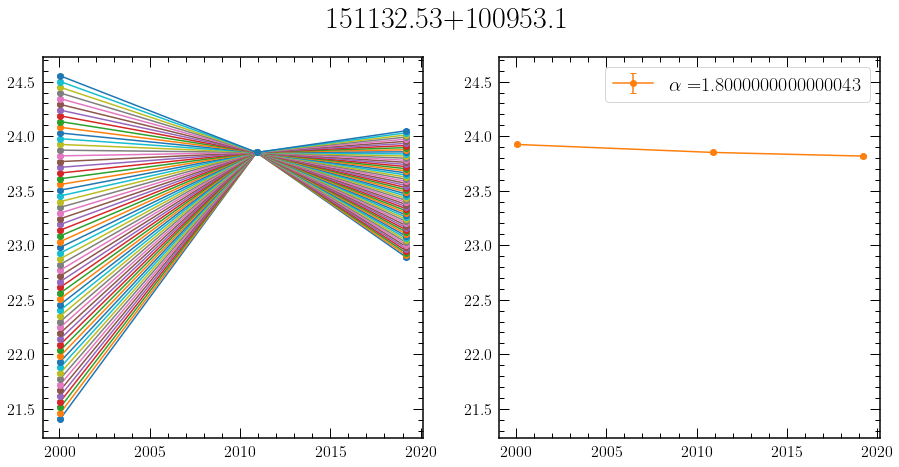

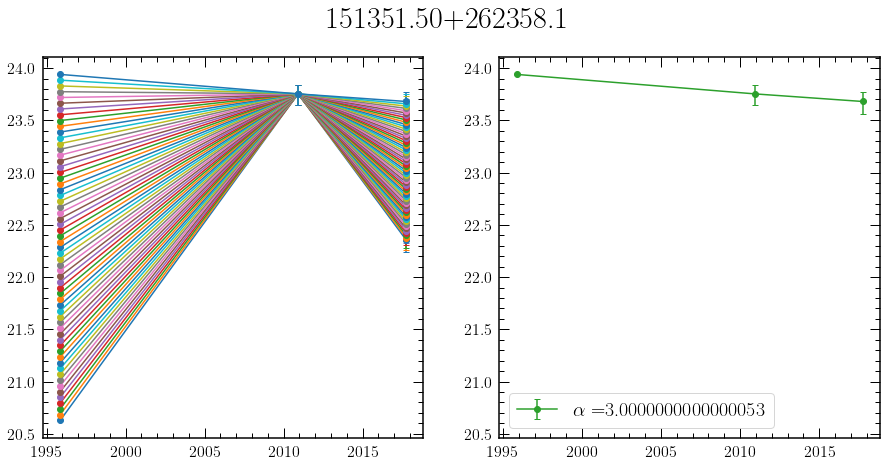

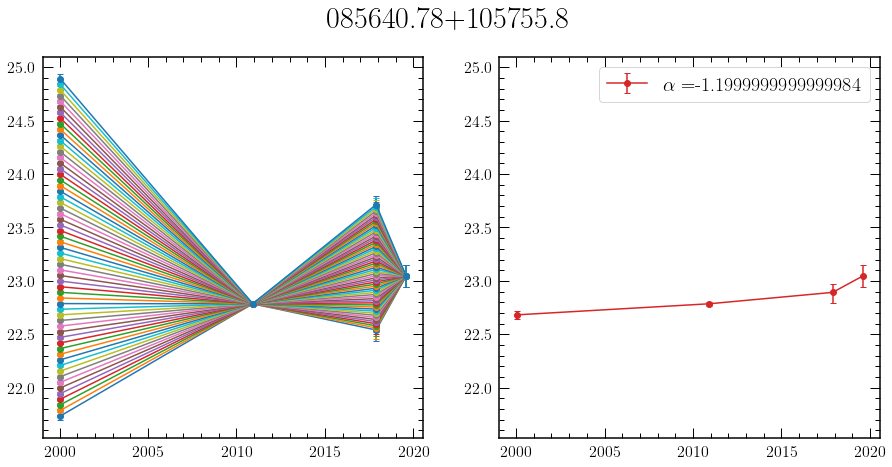

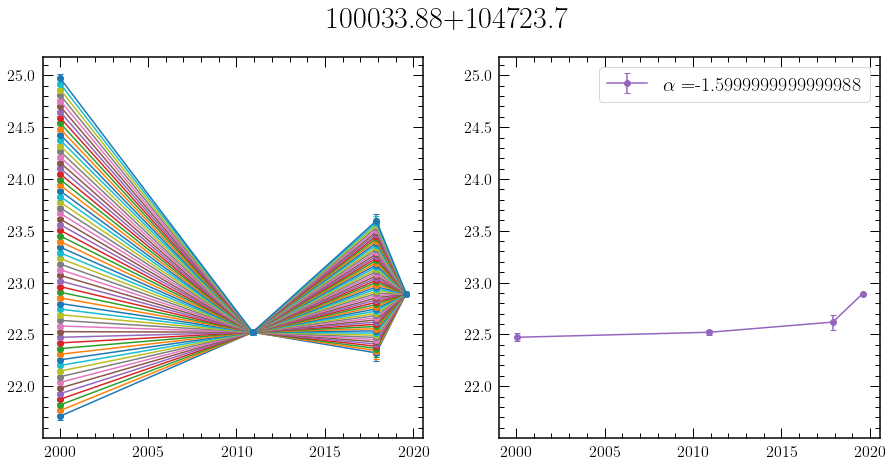

In [44]:
mpl_col =  plt.rcParams['axes.prop_cycle'].by_key()['color']

#Name the quasars not well fit
inames = ["101719.02+151620.8", "151132.53+100953.1", "151351.50+262358.1",
         "085640.78+105755.8", "100033.88+104723.7"]

#An array indexing which have vlass measurements
ivlass = [True, True, True, False, False]

interest = df.loc[df['Name'].isin(inames)]
idata    = data[df['Name'].isin(inames)]
idates   = dates_fit[df['Name'].isin(inames)]
iz       = z[df['Name'].isin(inames)]
ialphas  = []

#Do the same loop ... but make alpha a free parameter
data_best_list = [] #save results to plot

alphas = np.arange(-3.0, 3.1, 0.1)

for i in range(len(idata)):
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15,7))
    if ivlass[i]:
        chisq_best = 1. #intialize chisq stat 
        alpha_best = 3. #intialize alpha stat
        data_best  = idata[i].copy()
        for alpha in alphas:
            
            iidata = idata[i].copy()
            #Convert the FIRST/VLASS measurements
            iidata[0] = ialpha(iidata[0], 6., 1.4, alpha, iz[i], minp7=False)
            iidata[2] = ialpha(iidata[2], 6., 3., alpha, iz[i], minp7=False)
            
            #do linear fit on both alpha=0.0 and -0.7 data
            fit_alpha = np.polyfit(idates[i][:-1], iidata[:-1],1) 

            #write out linear equations for those fits
            y = fit_alpha[0]*idates[i][:-1] + fit_alpha[1]

            #do chi squared test to check which data follow the linear model better
            chisq_alpha = spstats.chisquare(iidata[:-1], y)[0]
            if chisq_alpha<chisq_best:
                #if new alpha gives better fit, save it!
                chisq_best = chisq_alpha
                alpha_best = alpha
                data_best  = iidata
                
            ax1.errorbar(idates[i][:-1], iidata[:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                 fmt="-o", label="$\\alpha=$"+str(alpha))
            #ax1.set_ylim(22.0, 24.0)
            #ax1.set_xlim(1993, 2020)
        
        ax2.errorbar(idates[i][:-1], data_best[:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                 fmt="-o", label="$\\alpha=$"+str(alpha_best), color=mpl_col[i])
        ax2.set_ylim(ax1.get_ylim())
        ax2.set_xlim(ax1.get_xlim())
        ax2.legend(loc="best", prop={"size":20})
        plt.suptitle(str(inames[i]), fontsize=30)
        plt.savefig("../PaperPlots/varanalysis_interestingspectra_{}.pdf".format(inames[i]))
        plt.show()
        
    else:
        chisq_best = 1. #initialize chisq stat
        alpha_best = 3. #intialize alpha stat
        data_best  = idata[i].copy()
        for alpha in alphas:
            
            iidata = idata[i].copy()
            #Convert the FIRST/VLASS measurements
            iidata[0] = ialpha(iidata[0], 6., 1.4, alpha, iz[i])
            iidata[2] = ialpha(iidata[2], 6., 3., alpha, iz[i])
            
            #do linear fit on both alpha=0.0 and -0.7 data
            fit_alpha = np.polyfit(idates[i], iidata, 1) 

            #write out linear equations for those fits
            y = fit_alpha[0]*idates[i] + fit_alpha[1]

            #do chi squared test to check which data follow the linear model better
            chisq_alpha = spstats.chisquare(iidata, y)[0]
            if chisq_alpha<chisq_best:
                #if new alpha gives better fit, save it!
                chisq_best = chisq_alpha
                alpha_best = alpha
                data_best  = iidata
                
            ax1.errorbar(idates[i], iidata, yerr=ierr[i], capsize=2.8, fmt="-o", label="$\\alpha=$"+str(alpha))
            #ax1.set_ylim(22.0, 24.0)
            #ax1.set_xlim(1993, 2020)
        
        ax2.errorbar(idates[i], data_best, yerr=ierr[i], capsize=2.8, fmt="-o", label="$\\alpha=$"+str(alpha_best), color=mpl_col[i])
            
        ax2.set_ylim(ax1.get_ylim())
        ax2.set_xlim(ax1.get_xlim())
        ax2.legend(loc="best", prop={"size":20})
        plt.suptitle(str(inames[i]), fontsize=30)
        plt.savefig("../PaperPlots/varanalysis_interestingspectra_{}.pdf".format(inames[i]))
        plt.show()
        
        ialphas.append(alpha_best)
    
    data_best_list.append(data_best)

In [62]:
idata

array([[22.4411812 , 23.40878627, 22.53817788,  0.        ],
       [22.98047042, 23.85056635, 23.46971795,  0.        ],
       [22.28424715, 23.75322942, 23.0181332 ,  0.        ],
       [22.94494377, 22.78530003, 22.99      , 23.04485978],
       [22.96108746, 22.52043963, 22.81      , 22.89336743]])

In [63]:
ialpha

<function __main__.ialpha(L_nu1, nu1, nu2, alpha, z, minp7=True)>

In [45]:
ierr

array([[[ 0.00000000e+00,  5.25834776e-02,  0.00000000e+00,
         -9.90000000e+01],
        [ 0.00000000e+00,  4.68988696e-02,  0.00000000e+00,
         -9.90000000e+01]],

       [[ 1.34836754e-02,  1.35423158e-02,  1.32664739e-02,
         -9.90000000e+01],
        [ 1.30776189e-02,  1.31327731e-02,  1.28732040e-02,
         -9.90000000e+01]],

       [[ 0.00000000e+00,  1.10241244e-01,  1.17374266e-01,
         -9.90000000e+01],
        [ 0.00000000e+00,  8.78466840e-02,  9.23072688e-02,
         -9.90000000e+01]],

       [[ 4.00000000e-02,  2.00000000e-02,  1.00000000e-01,
          1.00000000e-01],
        [ 4.00000000e-02,  2.00000000e-02,  8.10000000e-02,
          1.00000000e-01]],

       [[ 4.06369875e-02,  2.67135435e-02,  8.10000000e-02,
          6.12420644e-03],
        [ 3.71578068e-02,  2.51651689e-02,  6.90000000e-02,
          6.03904541e-03]]])

In [46]:
df[RQ]

Name      z  S1p4_FCat  S1p4_Fcat_e  S1p4_FIRST  S1p4_err  \
41  082205.24+455349.1  0.300        NaN          NaN         677       201   
42  084313.41+535718.8  0.218        NaN          NaN         766       222   
43  085640.78+105755.8  0.274       1.35     0.135950        1350       135   
44  093509.48+481910.2  0.224       1.85     0.139283        1850       139   
45  100033.88+104723.7  0.226       2.02     0.146956        2020       146   
46  100438.82+151057.3  0.219       1.39     0.136910        1390       136   
47  101000.68+300321.5  0.256       1.54     0.131503        1540       131   
48  101325.43+221229.4  0.274       1.07     0.135769        1069       135   
49  104528.30+293344.7  0.293        NaN          NaN         846       147   
50  104541.76+520235.5  0.284        NaN          NaN         740       226   
51  112941.94+512050.5  0.234       1.10     0.145756        1100       145   
52  115558.97+593129.2  0.241        NaN          NaN         883       154   
53  115753.20-031537.1  0.215       2.83     0.148813        2830       148   
54  121832.68+352255.8  0.240       2.29     0.148409        2290       148   
55  122018.43+064119.6  0.286        NaN          NaN         804       114   
56  123532.83+410445.1  0.212        NaN          NaN         510         0   
57  125236.15+140213.9  0.266        NaN          NaN         876       169   
58  130416.99+020537.0  0.229        NaN          NaN        1116       122   
59  130456.91+395111.4  0.271        NaN          NaN         867       154   
60  135326.12+362049.4  0.285       1.71     0.145825        1710       145   
61  142522.37+080327.1  0.230        NaN          NaN         366         0   
62  145824.46+363119.5  0.246        NaN          NaN         495         0   
63  153539.25+564406.5  0.207        NaN          NaN        1014       217   
64  155620.23+521520.0  0.227       1.26     0.138154        1260       138   
65  161711.42+063833.4  0.229        NaN          NaN         630         0   
66  161723.67+085414.7  0.206        NaN          NaN         450         0   
67  161940.56+254323.0  0.269       1.66     0.141143        1660       141   
68  162750.54+473623.5  0.262       1.48     0.136389        1480       136   
69  172711.80+632242.1  0.217       1.36     0.140837        1360       140   

      S6_FIRST  S6_FIRST_err  S6_FIRST_alpha0  S6_FIRST_alpha0_err  ...  \
41  154.174172     45.855082            427.0                127.0  ...   
42  186.308835     54.159545            516.0                150.0  ...   
43  404.390000     50.500000           1120.0                140.0  ...   
44  570.480543     39.717000           1580.0                110.0  ...   
45  642.693270     57.409118           1780.0                159.0  ...   
46  422.444453     22.385945           1170.0                 62.0  ...   
47  474.798680     24.191264           1315.0                 67.0  ...   
48  297.877499     29.246154            825.0                 81.0  ...   
49  215.193926     37.550618            596.0                104.0  ...   
50  176.921181     54.159545            490.0                150.0  ...   
51  317.735999     43.688700            880.0                121.0  ...   
52  228.553281     40.078063            633.0                111.0  ...   
53  931.544177     50.548909           2580.0                140.0  ...   
54  736.569815     43.327636           2040.0                120.0  ...   
55  200.029254     28.524027            554.0                 79.0  ...   
56  184.142454      0.000000            510.0                  0.0  ...   
57  226.025835     43.688700            626.0                121.0  ...   
58  312.681108     34.301045            866.0                 95.0  ...   
59  222.776263     39.717000            617.0                110.0  ...   
60  523.542270     50.548909           1450.0                140.0  ...   
61  132.149290      0.000000            366.0                  0.0  ... 

In [47]:
range(len(idata))

range(0, 5)

In [48]:
idata, idates

(array([[22.4411812 , 23.40878627, 22.53817788,  0.        ],
        [22.98047042, 23.85056635, 23.46971795,  0.        ],
        [22.28424715, 23.75322942, 23.0181332 ,  0.        ],
        [22.94494377, 22.78530003, 22.99      , 23.04485978],
        [22.96108746, 22.52043963, 22.81      , 22.89336743]]),
 array([[1999.8744011 , 2011.00273785, 2017.7664271 , 9999.00273785],
        [2000.04106776, 2010.91940452, 2019.19952088, 9999.00273785],
        [1995.86892539, 2010.91940452, 2017.7554757 , 9999.00273785],
        [2000.04106776, 2010.91940452, 2017.8908282 , 2019.58607118],
        [2000.04106776, 2010.91940452, 2017.90451745, 2019.58607118]]))

In [49]:
ierr

array([[[ 0.00000000e+00,  5.25834776e-02,  0.00000000e+00,
         -9.90000000e+01],
        [ 0.00000000e+00,  4.68988696e-02,  0.00000000e+00,
         -9.90000000e+01]],

       [[ 1.34836754e-02,  1.35423158e-02,  1.32664739e-02,
         -9.90000000e+01],
        [ 1.30776189e-02,  1.31327731e-02,  1.28732040e-02,
         -9.90000000e+01]],

       [[ 0.00000000e+00,  1.10241244e-01,  1.17374266e-01,
         -9.90000000e+01],
        [ 0.00000000e+00,  8.78466840e-02,  9.23072688e-02,
         -9.90000000e+01]],

       [[ 4.00000000e-02,  2.00000000e-02,  1.00000000e-01,
          1.00000000e-01],
        [ 4.00000000e-02,  2.00000000e-02,  8.10000000e-02,
          1.00000000e-01]],

       [[ 4.06369875e-02,  2.67135435e-02,  8.10000000e-02,
          6.12420644e-03],
        [ 3.71578068e-02,  2.51651689e-02,  6.90000000e-02,
          6.03904541e-03]]])

In [50]:
spstats.chisquare(iidata, y)[0]

0.07273981504418045

In [51]:
#Format the errors need to be in
np.array([errs_ri[0][alpha_ri==-0.7][i], errs_ri[1][alpha_ri==-0.7][i], errs_ri[2][alpha_ri==-0.7][i]]).T

array([[0.02235833, 0.01626098, 0.11812412],
       [0.02126342, 0.01567404, 0.09276932]])

In [52]:
errs_rq = np.array([L6_first_err[RQ], L6_kell_err[RQ], L6_Aconfig_err[RQ]])
errs_ri = np.array([L6_first_err[RI], L6_kell_err[RI], L6_vlass_err[RI]])
errs_rl = np.array([L6_first_err[RL], L6_kell_err[RL], L6_vlass_err[RL]])

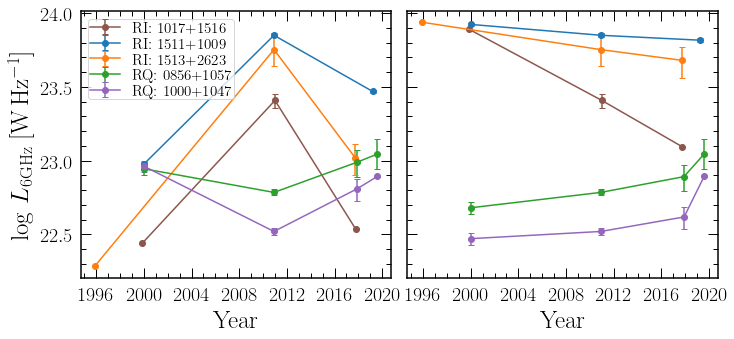

In [53]:
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(10.5,5))

for i in range(len(idata)):
    if ivlass[i]:
        ax1.errorbar(idates[i][0:-1], idata[i][0:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                     fmt="-o", label="RI: {}".format(same_name(inames[i])), color=icolors[i])
        ax2.errorbar(idates[i][0:-1], data_best_list[i][0:-1], yerr=ierr[i][:,:-1], capsize=2.8, fmt="-o", color=icolors[i])
        
    else:
        ax1.errorbar(idates[i], idata[i], yerr=ierr[i], capsize=2.8, fmt="-o", label="RQ: {}".format(same_name(inames[i])), color=icolors[i])
        ax2.errorbar(idates[i], data_best_list[i], yerr=ierr[i], capsize=2.8, fmt="-o", color=icolors[i])

ticks = np.arange(1996, 2021, 4)

ylims1 = ax1.get_ylim()
ylims2 = ax2.get_ylim()
ax1.set_ylim(ylims1[0],ylims2[1])
ax2.set_ylim(ylims1[0],ylims2[1])

ax1.legend(loc="best", labelspacing=0.05, borderpad=0.1, prop={"size": 15})
ax1.set_xlabel("Year", fontsize=25)
ax1.set_ylabel("log $L_\mathrm{6GHz}$ [W\,Hz$^{-1}$]", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.set_yticklabels(axis='both', which='major', labelsize=20)
#ax1.set_xticks(ticks)
ax2.set_xlabel("Year", fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.set_yticklabels([])

ax1.set_xticks(ticks)
ax2.set_xticks(ticks)

#plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.tight_layout(w_pad=0.05)
plt.savefig("../PaperPlots/alphafreeparam_5QSOs.pdf")
plt.show()

Only care about the second panel.

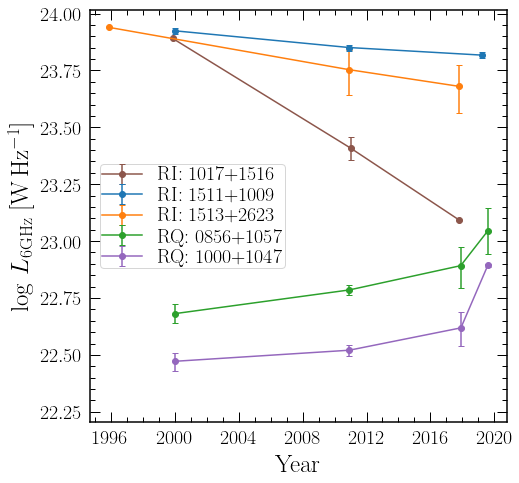

In [105]:
fig, ax1, = plt.subplots(1, 1, figsize=(7.5,7))

for i in range(len(idata)):
    if ivlass[i]:
        ax1.errorbar(idates[i][0:-1], data_best_list[i][0:-1], yerr=ierr[i][:,:-1], capsize=2.8, 
                     fmt="-o", color=icolors[i], label="RI: {}".format(same_name(inames[i])))
        
    else:
        ax1.errorbar(idates[i], data_best_list[i], yerr=ierr[i], capsize=2.8, fmt="-o", 
                     color=icolors[i], label="RQ: {}".format(same_name(inames[i])))

ticks = np.arange(1996, 2021, 4)

ylims = ax1.get_ylim()
ax1.set_ylim(ylims1[0],ylims2[1])

ax1.legend(loc="best", labelspacing=0.075, borderpad=0.1, prop={"size": 20})
ax1.set_xlabel("Year", fontsize=25)
ax1.set_ylabel("log $L_\mathrm{6GHz}$ [W\,Hz$^{-1}$]", fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=20)
#ax1.set_yticklabels(axis='both', which='major', labelsize=20)
#ax1.set_xticks(ticks)

ax1.set_xticks(ticks)

#plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.tight_layout(w_pad=0.05)
plt.savefig("../PaperPlots/alphafreeparam_5QSOs.pdf")
plt.show()

In [56]:
data_best_list

[array([23.89068663, 23.40878627, 23.09400161,  0.        ]),
 array([23.92391376, 23.85056635, 23.81737349,  0.        ]),
 array([23.93951991, 23.75322942, 23.6804263 ,  0.        ]),
 array([22.68151688, 22.78530003, 22.89206972, 23.04485978]),
 array([22.47190799, 22.52043963, 22.61871443, 22.89336743])]

In [65]:
idata

array([[22.4411812 , 23.40878627, 22.53817788,  0.        ],
       [22.98047042, 23.85056635, 23.46971795,  0.        ],
       [22.28424715, 23.75322942, 23.0181332 ,  0.        ],
       [22.94494377, 22.78530003, 22.99      , 23.04485978],
       [22.96108746, 22.52043963, 22.81      , 22.89336743]])

In [66]:
ialpha??

In [72]:
from matplotlib.ticker import MaxNLocator

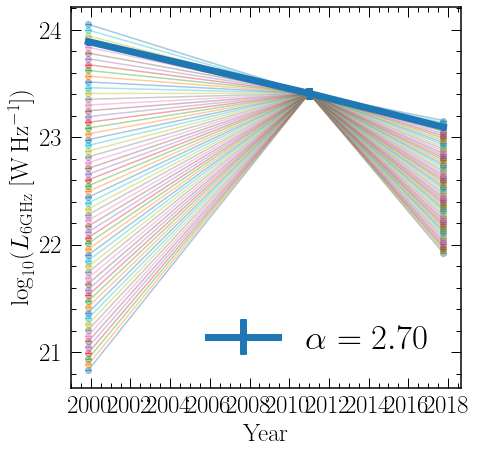

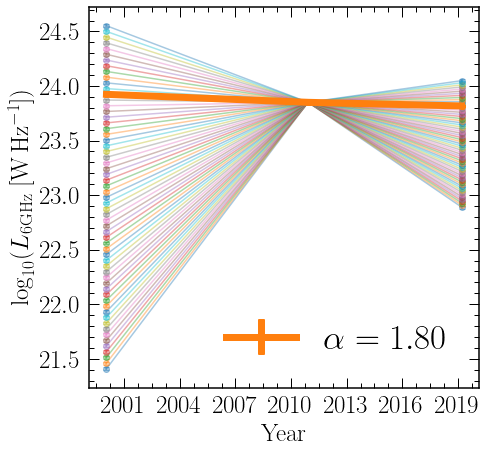

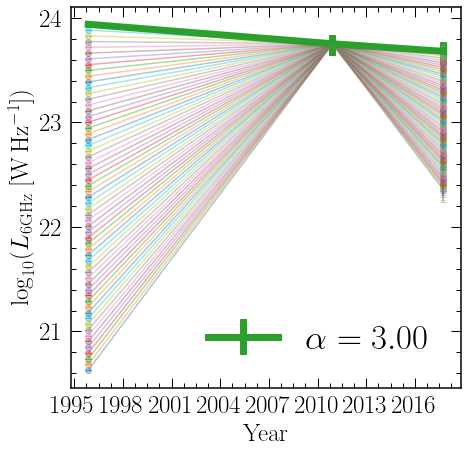

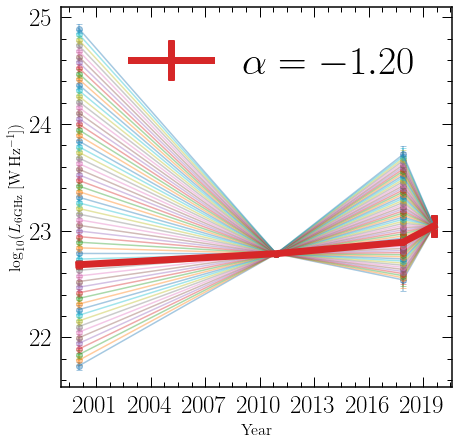

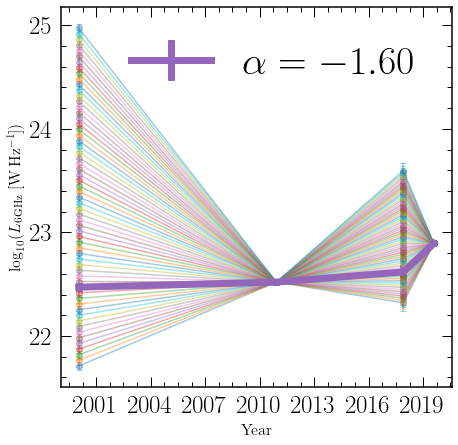

In [82]:
mpl_col =  plt.rcParams['axes.prop_cycle'].by_key()['color']
lw = 7

#Name the quasars not well fit
inames = ["101719.02+151620.8", "151132.53+100953.1", "151351.50+262358.1",
         "085640.78+105755.8", "100033.88+104723.7"]

#An array indexing which have vlass measurements
ivlass = [True, True, True, False, False]

interest = df.loc[df['Name'].isin(inames)]
idata    = data[df['Name'].isin(inames)]
idates   = dates_fit[df['Name'].isin(inames)]
iz       = z[df['Name'].isin(inames)]
ialphas  = []

#Do the same loop ... but make alpha a free parameter
data_best_list = [] #save results to plot

alphas = np.arange(-3.0, 3.1, 0.1)

for i in range(len(idata)):
    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    if ivlass[i]: #is RI
        chisq_best = 1. #intialize chisq stat 
        alpha_best = 3. #intialize alpha stat
        data_best  = idata[i].copy()
        for alpha in alphas:
            #want to plot all "tries," but bolden the success - do by re-plotting after the fact
            
            iidata = idata[i].copy()
            #Convert the FIRST/VLASS measurements
            iidata[0] = ialpha(iidata[0], 6., 1.4, alpha, iz[i], minp7=False)
            iidata[2] = ialpha(iidata[2], 6., 3., alpha, iz[i], minp7=False)
            
            #do linear fit on both alpha=0.0 and -0.7 data
            fit_alpha = np.polyfit(idates[i][:-1], iidata[:-1],1) 

            #write out linear equations for those fits
            y = fit_alpha[0]*idates[i][:-1] + fit_alpha[1]

            #do chi squared test to check which data follow the linear model better
            chisq_alpha = spstats.chisquare(iidata[:-1], y)[0]
            if chisq_alpha<chisq_best:
                #if new alpha gives better fit, save it!
                chisq_best = chisq_alpha
                alpha_best = alpha
                data_best  = iidata
                
            ax.errorbar(idates[i][:-1], iidata[:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                 fmt="-o", alpha=0.4)
            #ax1.set_ylim(22.0, 24.0)
            #ax1.set_xlim(1993, 2020)
        
        ax.errorbar(idates[i][:-1], data_best[:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                 fmt="-o", label="$\\alpha=%.2f$"%alpha_best, color=mpl_col[i], linewidth=lw)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.set_xlabel("Year", fontsize=25)
        ax.set_ylabel("$\log_{10}(L_\mathrm{6GHz}$ [W\,Hz$^{-1}$])", fontsize=25)
        #ax2.set_ylim(ax1.get_ylim())
        #ax2.set_xlim(ax1.get_xlim())
        ax.legend(loc="best", prop={"size":35}, frameon=False)
        #plt.savefig("../PaperPlots/varanalysis_interestingspectra_{}.pdf".format(inames[i]))
        
        #Plot best val here
        
        plt.show()
        
    else:
        chisq_best = 1. #initialize chisq stat
        alpha_best = 3. #intialize alpha stat
        data_best  = idata[i].copy()
        for alpha in alphas:
            
            iidata = idata[i].copy()
            #Convert the FIRST/VLASS measurements
            iidata[0] = ialpha(iidata[0], 6., 1.4, alpha, iz[i])
            iidata[2] = ialpha(iidata[2], 6., 3., alpha, iz[i])
            
            #do linear fit on both alpha=0.0 and -0.7 data
            fit_alpha = np.polyfit(idates[i], iidata, 1) 

            #write out linear equations for those fits
            y = fit_alpha[0]*idates[i] + fit_alpha[1]

            #do chi squared test to check which data follow the linear model better
            chisq_alpha = spstats.chisquare(iidata, y)[0]
            if chisq_alpha<chisq_best:
                #if new alpha gives better fit, save it!
                chisq_best = chisq_alpha
                alpha_best = alpha
                data_best  = iidata
                
            ax.errorbar(idates[i], iidata, yerr=ierr[i], capsize=2.8, fmt="-o", alpha=0.4)
            #ax1.set_ylim(22.0, 24.0)
            #ax1.set_xlim(1993, 2020)
        
        ax.errorbar(idates[i], data_best, yerr=ierr[i], capsize=2.8, fmt="-o", label="$\\alpha=%.2f$"%alpha_best, 
                    color=mpl_col[i], linewidth=lw)
            
        #ax.set_title(str(inames[i]), fontsize=30)
        ax.legend(loc="best", prop={"size":40}, frameon=False)
        ax.set_xlabel("Year")
        ax.set_ylabel("$\log_{10}(L_\mathrm{6GHz}$ [W\,Hz$^{-1}$])")
        ax.tick_params(axis='both', which='major', labelsize=25)
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.savefig("../PaperPlots/varanalysis_interestingspectra_{}.pdf".format(inames[i]))
        plt.show()
        
        ialphas.append(alpha_best)
    
    data_best_list.append(data_best)

In [93]:
len(idata), len(axs)

(5, 5)

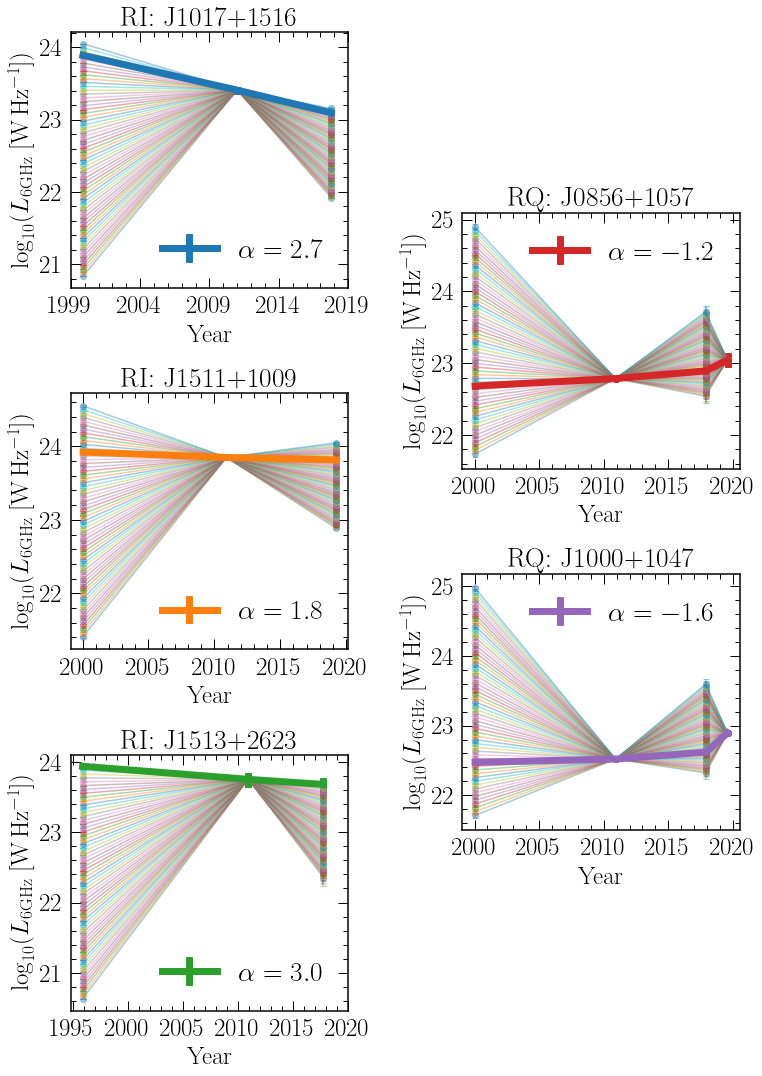

In [104]:
fig3 = plt.figure(constrained_layout=False, figsize=(12,18))
gs = fig3.add_gridspec(6, 4, hspace=1.4, wspace=1.4)

f3_ax1 = fig3.add_subplot(gs[:2, :2])
f3_ax2 = fig3.add_subplot(gs[2:4, :2])
f3_ax3 = fig3.add_subplot(gs[4:, :2])
f3_ax4 = fig3.add_subplot(gs[1:3, 2:])
f3_ax5 = fig3.add_subplot(gs[3:5, 2:])

axs = [f3_ax1, f3_ax2, f3_ax3, f3_ax4, f3_ax5]

mpl_col =  plt.rcParams['axes.prop_cycle'].by_key()['color']
lw = 7

#Name the quasars not well fit
inames = ["101719.02+151620.8", "151132.53+100953.1", "151351.50+262358.1",
         "085640.78+105755.8", "100033.88+104723.7"]

#An array indexing which have vlass measurements
ivlass = [True, True, True, False, False]

interest = df.loc[df['Name'].isin(inames)]
idata    = data[df['Name'].isin(inames)]
idates   = dates_fit[df['Name'].isin(inames)]
iz       = z[df['Name'].isin(inames)]
ialphas  = []

#Do the same loop ... but make alpha a free parameter
data_best_list = [] #save results to plot

alphas = np.arange(-3.0, 3.1, 0.1)

for i in range(len(idata)):
    if ivlass[i]: #is RI
        chisq_best = 1. #intialize chisq stat 
        alpha_best = 3. #intialize alpha stat
        data_best  = idata[i].copy()
        for alpha in alphas:
            #want to plot all "tries," but bolden the success - do by re-plotting after the fact
            
            iidata = idata[i].copy()
            #Convert the FIRST/VLASS measurements
            iidata[0] = ialpha(iidata[0], 6., 1.4, alpha, iz[i], minp7=False)
            iidata[2] = ialpha(iidata[2], 6., 3., alpha, iz[i], minp7=False)
            
            #do linear fit on both alpha=0.0 and -0.7 data
            fit_alpha = np.polyfit(idates[i][:-1], iidata[:-1],1) 

            #write out linear equations for those fits
            y = fit_alpha[0]*idates[i][:-1] + fit_alpha[1]

            #do chi squared test to check which data follow the linear model better
            chisq_alpha = spstats.chisquare(iidata[:-1], y)[0]
            if chisq_alpha<chisq_best:
                #if new alpha gives better fit, save it!
                chisq_best = chisq_alpha
                alpha_best = alpha
                data_best  = iidata
                
            axs[i].errorbar(idates[i][:-1], iidata[:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                 fmt="-o", alpha=0.4)
            #ax1.set_ylim(22.0, 24.0)
            #ax1.set_xlim(1993, 2020)
        
        axs[i].errorbar(idates[i][:-1], data_best[:-1], yerr=ierr[i][:,:-1], capsize=2.8,
                 fmt="-o", label="$\\alpha=%.1f$"%alpha_best, color=mpl_col[i], linewidth=lw)
        #axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
        axs[i].set_title("RI: J{}".format(same_name(inames[i])), fontsize=27.5)
        axs[i].set_xticks(np.arange(int(min(idates[i][:-1])), int(max(idates[i][:-1])+5), 5))
        axs[i].tick_params(axis='both', which='major', labelsize=25)
        axs[i].set_xlabel("Year", fontsize=25)
        axs[i].set_ylabel("$\log_{10}(L_\mathrm{6GHz}$ [W\,Hz$^{-1}$])", fontsize=25)
        #ax2.set_ylim(ax1.get_ylim())
        #ax2.set_xlim(ax1.get_xlim())
        axs[i].legend(loc="best", prop={"size":27.5}, frameon=False)
        #plt.savefig("../PaperPlots/varanalysis_interestingspectra_{}.pdf".format(inames[i]))
        
        #Plot best val here
        
        #plt.show()
        
    else:
        chisq_best = 1. #initialize chisq stat
        alpha_best = 3. #intialize alpha stat
        data_best  = idata[i].copy()
        for alpha in alphas:
            
            iidata = idata[i].copy()
            #Convert the FIRST/VLASS measurements
            iidata[0] = ialpha(iidata[0], 6., 1.4, alpha, iz[i])
            iidata[2] = ialpha(iidata[2], 6., 3., alpha, iz[i])
            
            #do linear fit on both alpha=0.0 and -0.7 data
            fit_alpha = np.polyfit(idates[i], iidata, 1) 

            #write out linear equations for those fits
            y = fit_alpha[0]*idates[i] + fit_alpha[1]

            #do chi squared test to check which data follow the linear model better
            chisq_alpha = spstats.chisquare(iidata, y)[0]
            if chisq_alpha<chisq_best:
                #if new alpha gives better fit, save it!
                chisq_best = chisq_alpha
                alpha_best = alpha
                data_best  = iidata
                
            axs[i].errorbar(idates[i], iidata, yerr=ierr[i], capsize=2.8, fmt="-o", alpha=0.4)
            #ax1.set_ylim(22.0, 24.0)
            #ax1.set_xlim(1993, 2020)
        
        axs[i].errorbar(idates[i], data_best, yerr=ierr[i], capsize=2.8, fmt="-o", label="$\\alpha=%.1f$"%alpha_best, 
                    color=mpl_col[i], linewidth=lw)
            
        axs[i].set_title("RQ: J{}".format(same_name(inames[i])), fontsize=27.5)
        axs[i].legend(loc="best", prop={"size":27.5}, frameon=False)
        axs[i].set_xlabel("Year", fontsize=25)
        axs[i].set_ylabel("$\log_{10}(L_\mathrm{6GHz}$ [W\,Hz$^{-1}$])", fontsize=25)
        axs[i].set_xticks(np.arange(int(min(idates[i])), int(max(idates[i])+5), 5))
        axs[i].tick_params(axis='both', which='major', labelsize=25)
        #axs[i].xaxis.set_major_locator(MaxNLocator(integer=True))
        #plt.savefig("../PaperPlots/varanalysis_interestingspectra_{}.pdf".format(inames[i]))
        #plt.show()
        
        ialphas.append(alpha_best)
    
    data_best_list.append(data_best)
plt.savefig("../PaperPlots/varanalysis_full_5panel.pdf")
plt.show()